# Price Prediction for Airbnb

Group 3: Dhruv Shah, Jenn Hong (Zhengyi), Setu Shah, Sonya Dreyer

Colab Link: https://colab.research.google.com/drive/1UEozeXmLsLyeCkl_qaGhTkERaC0n_Lie?usp=sharing

---
## Problem Definition

The problem of pricing on Airbnb is a complex challenge that involves finding a balance between maximizing revenue for hosts and providing fair and transparent pricing for guests. The goal of our project is to develop a predictive model that can accurately estimate the price of Airbnb listings based on a set of relevant features. These models help hosts set competitive prices for their listings and help guests to make more informed decisions. We aim to provide data-driven insights into setting and evaluating Airbnb listing prices. This can lead to a more efficient and satisfying marketplace for everyone, offering a holistic approach to the Airbnb experience.

---
## Data Source and Description
Our dataset is called “Airbnb Listings & Reviews”, sourced from [Maven Analytics](https://www.mavenanalytics.io/data-playground?accessType=open&page=6&pageSize=5), a well-known platform for high-quality datasets and data-related educational resources. Please find the dataset [here](https://maven-datasets.s3.amazonaws.com/Airbnb/Airbnb+Data.zip).

Our dataset contains ~280,000 rows and 33 columns. The types of variables include numeric, categorical, date, and string. We will clean the data by transforming the columns into their relevant data types, treating missing values and outliers, and performing exploratory data visualizations.



| Column title       | Description                                                  |
| :----------------- | :----------------------------------------------------------- |
| `Listing_id`        | A unique identification number for a listing on Airbnb|
| `name`         | Name of the listing |
| `host_id` | A unique identification number for a host on Airbnb|
| `host_since`       | A datetime column for when the host started their listings on Airbnb  |
| `host_location`    | Location of the host  |
| `host_response_time`       | A categorical column that describes how fast the host responds to guests |
| `host_response_rate`       | A numerical column for the percentage of time that the host responds to the guest|
| `host_acceptance_rate`     | A numerical column for the percentage of applications accepted by the host|
| `host_is_superhost` | A boolean column for whether the host holds the superhost title |
| `host_total_listings_count`  | Total number of listings a host has on Airbnb|
| `host_identity_verified`  | A boolean column for whether the host is verified on Airbnb |
| `neighbourhood`  | The neighbourhood the listing belongs to |
| `district`  | The district the listing belongs to |
| `city`  | The city the listing belongs to |
| `latitude`  | The latitude of the listing |
| `longitude`  | The longitude of the listing |
| `property_type`  | The type of property the listing belongs to |
| `room_type`  | The type of room/rooms the listing has |
| `accommodates`  | Total number of people that the property can accommodate|
| `bedrooms`  | Total number of bedrooms in the listing |
| `ammentities`  | A column with the list of ammenities being provided at the property |
| `price`  | Price of the property per night |
| `minimum_nights`  | The minimum number of nights that a guest has to book the property for |
| `maximum_nights`  | The maximum number of nights that a guest can book the property for |
| `review_scores_rating`  | Average rating of a listing |
| `review_scores_accuracy`  |Average rating of how accurate the listing is to reality|
| `review_scores_cleanliness`  | Average rating of how clean the property is |
| `review_scores_checkin`  | Average rating of how smooth the check-in process is|
| `review_scores_communication`  | Average rating of how well the host communicates with the guest |
| `review_scores_location`  | Average rating of how good the location of the property is|
| `review_scores_value`  | Average rating of how much value a guest derives out of the booking |
| `instant_bookable`  | A boolean column which shows whether the property is instantly bookable |


## Loading the Data




In [ ]:
# Import preprocessing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Download the file

!wget 'https://maven-datasets.s3.amazonaws.com/Airbnb/Airbnb+Data.zip'

--2023-12-05 23:18:48--  https://maven-datasets.s3.amazonaws.com/Airbnb/Airbnb+Data.zip
Resolving maven-datasets.s3.amazonaws.com (maven-datasets.s3.amazonaws.com)... 52.216.57.201, 54.231.232.185, 52.216.208.185, ...
Connecting to maven-datasets.s3.amazonaws.com (maven-datasets.s3.amazonaws.com)|52.216.57.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91005234 (87M) [application/zip]
Saving to: ‘Airbnb+Data.zip.2’

Airbnb+Data.zip.2   100%[===================>]  86.79M  21.1MB/s    in 4.3s    

2023-12-05 23:18:53 (20.4 MB/s) - ‘Airbnb+Data.zip.2’ saved [91005234/91005234]



In [ ]:
# Unzip the file

!unzip Airbnb+Data.zip

Archive:  Airbnb+Data.zip
replace Airbnb Data/Listings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Load the data frame

listings =  pd.read_csv('/content/Airbnb Data/Listings.csv', encoding = 'latin1', low_memory = False)

Our dataset had a lot of rows with missing values in multiple columns. We decided to drop these rows as they did not provide any useful information for our model.

In [ ]:
# Drop rows with more than a custom threshold of NULL values

custom_threshold = 0.80  # We arrived at this threshold after multiple iterations
threshold = int(custom_threshold * len(listings.columns))  # Convert to an integer for the thresh parameter
listings = listings.dropna(thresh=threshold)

## Random Sample of Data

---

As our dataset was too large, we decided to take a smaller (random) sample to reduce computing time and resources required for building multiple models. We took a sample of 100,000 rows, which is about a third of our original dataset.

In [ ]:
# Taking a random sample of the data for easier analysis

listings_sample = listings.sample(100000, random_state = 42)

In [ ]:
listings_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 203615 to 121844
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   100000 non-null  int64  
 1   name                         99983 non-null   object 
 2   host_id                      100000 non-null  int64  
 3   host_since                   100000 non-null  object 
 4   host_location                99853 non-null   object 
 5   host_response_time           59839 non-null   object 
 6   host_response_rate           59839 non-null   float64
 7   host_acceptance_rate         69316 non-null   float64
 8   host_is_superhost            100000 non-null  object 
 9   host_total_listings_count    100000 non-null  float64
 10  host_has_profile_pic         100000 non-null  object 
 11  host_identity_verified       100000 non-null  object 
 12  neighbourhood                100000 non-null  object 

In [ ]:
listings_sample.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
203615,44040446,Luxury Apartment with convenient transport,352980671,2020-07-01,"New York, New York, United States",within an hour,1.0,0.67,f,0.0,...,2,29,100.0,10.0,9.0,9.0,10.0,10.0,10.0,f
159952,15995943,stanza singola,88872950,2016-08-09,"Rome, Lazio, Italy",within an hour,1.0,1.00,f,9.0,...,1,30,88.0,9.0,9.0,9.0,9.0,10.0,9.0,t
271823,30467740,Studio au pied de Montmartre,7380413,2013-07-09,"Paris, Ile-de-France, France",NaN,NaN,0.82,f,1.0,...,1,5,90.0,9.0,10.0,10.0,10.0,10.0,10.0,t
251325,23505465,Quiet Garden Level Studio in the heart of Broo...,161326060,2017-12-04,"Brooklyn, New York, United States",NaN,NaN,NaN,f,1.0,...,30,30,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f
73846,42332116,Apartamento aconchegante e reformado no Flamengo,44423901,2015-09-17,"Leblon, State of Rio de Janeiro, Brazil",within a few hours,1.0,1.00,f,0.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [ ]:
listings_sample.isna().sum() / len(listings_sample)

listing_id                     0.00000
name                           0.00017
host_id                        0.00000
host_since                     0.00000
host_location                  0.00147
host_response_time             0.40161
host_response_rate             0.40161
host_acceptance_rate           0.30684
host_is_superhost              0.00000
host_total_listings_count      0.00000
host_has_profile_pic           0.00000
host_identity_verified         0.00000
neighbourhood                  0.00000
district                       0.84116
city                           0.00000
latitude                       0.00000
longitude                      0.00000
property_type                  0.00000
room_type                      0.00000
accommodates                   0.00000
bedrooms                       0.10313
amenities                      0.00000
price                          0.00000
minimum_nights                 0.00000
maximum_nights                 0.00000
review_scores_rating     

## Data Cleaning

### Column Transformations

---

To initiate the data cleaning process, our original focus was on column transformations. Initially, we converted the 'host_since' column to a datetime format, carefully specifying the date format. Subsequently, leveraging the transformed 'host_since' column, we computed a new metric named 'host_days.' This metric provides a more insightful measure of the duration since the individual acquired the host title. Consequently, we deemed it appropriate to eliminate the original 'host_since' column.

In [ ]:
# Converting the 'host_since' column to datetime
listings_sample['host_since'] = pd.to_datetime(listings_sample['host_since'])

# Defining reference date as Jan 1st, 2022
reference_date = pd.to_datetime('2022-01-01')

# Calculate the difference between the reference date and 'host_since'
listings_sample['host_days'] = (reference_date - listings_sample['host_since']).dt.days

# Dropping the original 'host_since' column
listings_sample.drop('host_since', axis=1, inplace=True)

In the original dataset, the 'review_scores_rating' was initially structured on a scale of 1 to 100 points. To maintain consistency with other review scores in the dataset, we converted the scale to a standardized range of 1 to 10 points. This adjustment ensures uniformity across the review metrics.

In [ ]:
# Converting review_scores_rating to the same scale (out of 10) as the other review scores

listings_sample.review_scores_rating = listings.review_scores_rating / 10

To ensure data comparability, we conducted a currency conversion for prices listed outside the United States by creating a dictionary mapping a predefined set of cities to their corresponding exchange rates. This transformation resulted in the introduction of a new column labeled 'usd_price,' representing prices consistently in US dollars. We subsequently removed the original 'price' column.

In [ ]:
# Getting unique city names

listings['city'].unique()

array(['Paris', 'New York', 'Bangkok', 'Rio de Janeiro', 'Sydney', 'Rome',
       'Hong Kong', 'Istanbul', 'Mexico City', 'Cape Town'], dtype=object)

In [ ]:
# Converting prices to USD

cities = ['Paris', 'New York', 'Bangkok', 'Rio de Janeiro', 'Sydney',
       'Istanbul', 'Rome', 'Hong Kong', 'Mexico City', 'Cape Town']
exchange_rates = [1.0808, 1, 0.028388, 0.20328, 0.65462, 0.039480, 1.0808, 0.12777, 0.0493, 0.053215] # current exchange rates as of December 5th, 2023

# Mapping each city to its exchange rate
currency_map = dict(zip(cities, exchange_rates))

# Creating a new column for usd_price
listings_sample['usd_price'] = listings_sample.apply(lambda row: row['price'] * currency_map[row['city']], axis=1)

# Drop original price column
listings_sample.drop('price', axis = 1, inplace = True)

In the concluding phase of the column transformation, we adjusted the column types for optimal representation. Specifically, we recognized that columns such as 'host_is_superhost,' 'host_has_profile_pic,' 'host_identity_verified' and 'instant_bookable' inherently contain boolean variables. To better capture their nature, we converted these columns into categorical variables.

Additionally, for columns like 'bedrooms', 'accommodates', and 'minimum_nights', which encompass discrete values, we also reassigned their types to categorical.

In [ ]:
# Changing columns to their relevant data types

listings_sample['host_is_superhost'] = listings_sample['host_is_superhost'].astype('object')
listings_sample['host_has_profile_pic'] = listings_sample['host_has_profile_pic'].astype('object')
listings_sample['host_identity_verified'] = listings_sample['host_identity_verified'].astype('object')
listings_sample['bedrooms'] = listings_sample['bedrooms'].astype('object')
listings_sample['accommodates'] = listings_sample['accommodates'].astype('object')
listings_sample['instant_bookable'] = listings_sample['instant_bookable'].astype('object')
listings_sample['minimum_nights'] = listings_sample['minimum_nights'].astype('float64')

### Dropping Columns

---

In the process of refining our predictive model, we carefully evaluated and made strategic decisions regarding the inclusion of certain columns in our dataset. The "listing_id" and "host_id" columns were excluded as they did not contribute any meaningful information to the prediction task. Additionally, the "name" column was deemed irrelevant and had the potential to introduce high cardinality problems. Similarly, "host_location," "neighbourhood," and "district" were dropped due to their lack of meaningful information for the prediction task and the potential for high cardinality issues. Notably, the "district" column was further excluded because it contained data exclusively from New York and exhibited over 50% missing values. Lastly, the "maximum_nights" column was omitted from our analysis due to discrepancies caused by hosts entering large numbers, even after attempts to rectify the issue, as the column failed to enhance the model's predictive capabilities. Lastly, the "amenities" column was also dropped as there were over thousands of unique amenities, and even after repeated attempts at feature selection, they failed to contribute valuable information to our models. Through these considered choices, we aimed to streamline our dataset and enhance the overall performance and interpretability of our predictive model.

In [ ]:
# Dropping hopeless columns

columns_to_drop = ['listing_id', 'name', 'host_id', 'host_location', 'neighbourhood', 'district',  'amenities', 'maximum_nights']

listings_sample = listings_sample.drop(columns=columns_to_drop, axis=1)

###Categorization

To simplify our workflow and enhance the manageability of our dataset, we addressed the diversity in the "property_type" column by identifying the top five most frequent categories. Subsequently, we categorized all other property types as 'Other.' This strategic approach allowed us to streamline the information, focusing on the most prevalent property types while consolidating the remaining ones under a unified 'Other' category.

In [ ]:
# Get top 5 property_type

listings_sample.property_type.value_counts()[0:5]

Entire apartment             54288
Private room in apartment    15197
Entire house                  4506
Private room in house         4370
Entire condominium            4057
Name: property_type, dtype: int64

In [ ]:
# Categorize the rest into 'Other' category

listings_sample['property_type'] = listings_sample['property_type'].apply(
    lambda x: 'Other' if x not in ('Entire apartment', 'Private room in apartment', 'Private room in house', 'Entire house', 'Entire condominium') else x)

listings_sample.property_type.value_counts()

Entire apartment             54288
Other                        17582
Private room in apartment    15197
Entire house                  4506
Private room in house         4370
Entire condominium            4057
Name: property_type, dtype: int64

###Dealing with Missing Values

We addressed missing values in "host_response_time" by imputing 'unknown,' ensuring comprehensive data for analysis and maintaining integrity in our predictive modeling.

In [ ]:
# Checking missing values for host_response_time

listings_sample.host_response_time.value_counts(dropna = False)

NaN                   40161
within an hour        35262
within a few hours    11481
within a day           8786
a few days or more     4310
Name: host_response_time, dtype: int64

In [ ]:
# Replacing missing values with 'unknown'

listings_sample['host_response_time'].fillna('unknown', inplace = True)

In [ ]:
# Checking percentage of NULL values by column

listings_sample.isnull().sum() / len(listings_sample) * 100

host_response_time              0.000
host_response_rate             40.161
host_acceptance_rate           30.684
host_is_superhost               0.000
host_total_listings_count       0.000
host_has_profile_pic            0.000
host_identity_verified          0.000
city                            0.000
latitude                        0.000
longitude                       0.000
property_type                   0.000
room_type                       0.000
accommodates                    0.000
bedrooms                       10.313
minimum_nights                  0.000
review_scores_rating            2.007
review_scores_accuracy          2.094
review_scores_cleanliness       2.086
review_scores_checkin           2.115
review_scores_communication     2.082
review_scores_location          2.112
review_scores_value             2.123
instant_bookable                0.000
host_days                       0.000
usd_price                       0.000
dtype: float64

###Outlier Treatment

Utilizing boxplots, we conducted a thorough examination for outliers within the columns 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'accommodates', 'bedrooms', and 'minimum_nights'.We set individual thresholds for each column based on a combination of real-time research findings and the statistical insights provided by the box plots.

We identified and subsequently removed outliers beyond the established thresholds in 'host_response_rate,' 'host_acceptance_rate,' 'host_total_listings_count,' 'bedrooms,' and 'minimum_nights.' Notably, during this process, we encountered instances of 'host_total_listings' exhibiting zero values, which were considered outliers or potential errors given the nature of the dataset (as it is improbable to have zero listings). These were consequently addressed.

It's worth noting that, despite the outlier identification process, we retained the 'accommodates' column without modification, as its minimum and maximum values were deemed reasonable and within acceptable bounds for our analysis.

In [ ]:
listings_sample.head(10).T

,203615,159952,271823,251325,73846,252320,62054,41559,47141,264307
host_response_time,within an hour,within an hour,unknown,unknown,within a few hours,unknown,within an hour,within an hour,a few days or more,within an hour
host_response_rate,1.0,1.0,NaN,NaN,1.0,NaN,1.0,0.9,0.0,1.0
host_acceptance_rate,0.67,1.0,0.82,NaN,1.0,NaN,0.97,0.91,1.0,1.0
host_is_superhost,f,f,f,f,f,f,f,f,f,f
host_total_listings_count,0.0,9.0,1.0,1.0,0.0,1.0,3.0,4.0,6.0,1.0
host_has_profile_pic,t,t,t,t,t,t,t,t,t,t
host_identity_verified,t,t,t,f,t,t,t,t,t,t
city,New York,Rome,Paris,New York,Rio de Janeiro,Sydney,Rio de Janeiro,New York,Rome,New York
latitude,40.65727,41.89736,48.89343,40.65854,-22.93542,-33.7956,-22.94539,40.71581,41.89494,40.65857
longitude,-73.90532,12.49926,2.35103,-73.99981,-43.1764,151.18815,-43.18331,-73.86197,12.45334,-73.92909


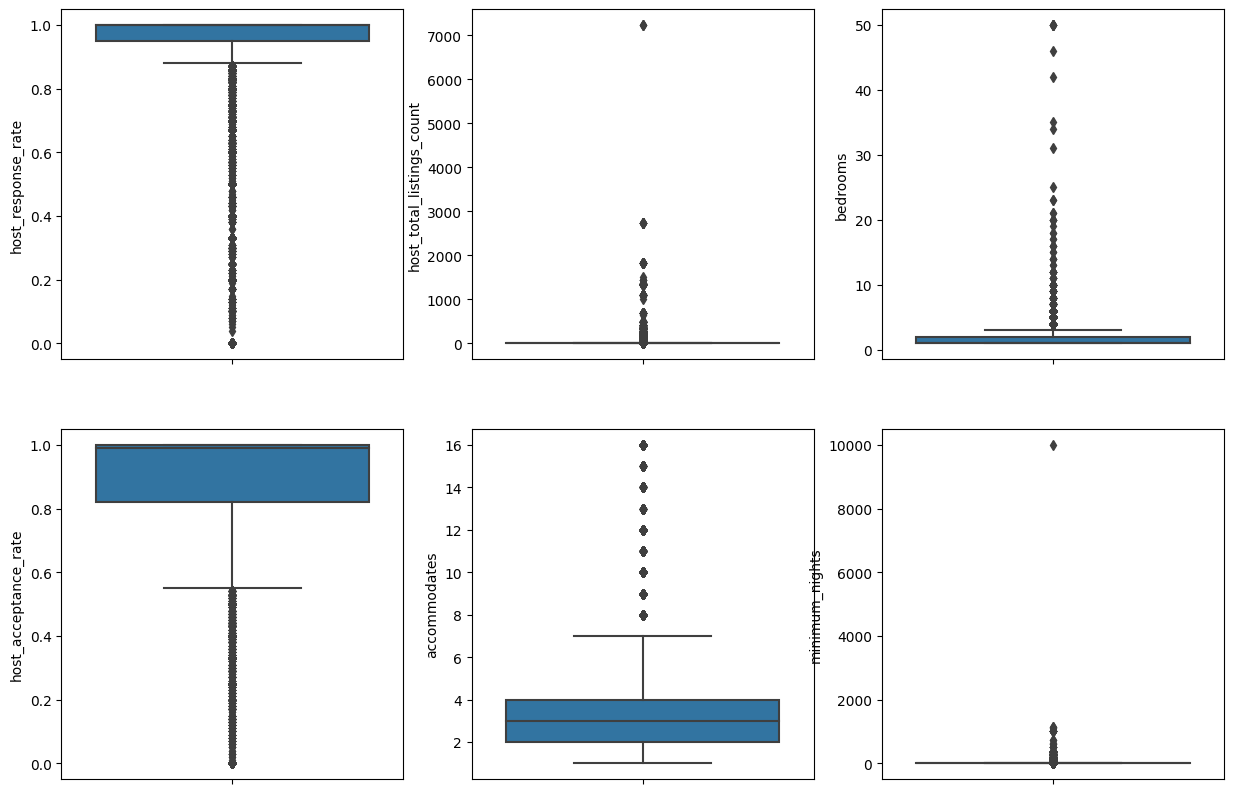

In [ ]:
# Checking for outliers

fig, axs = plt.subplots(2, 3, figsize = (15, 10))

sns.boxplot(listings_sample, y = 'host_response_rate', ax=axs[0, 0])
sns.boxplot(listings_sample, y = 'host_acceptance_rate', ax=axs[1, 0])
sns.boxplot(listings_sample, y = 'host_total_listings_count', ax=axs[0, 1])
sns.boxplot(listings_sample, y = 'accommodates', ax=axs[1, 1])
sns.boxplot(listings_sample, y = 'bedrooms', ax=axs[0, 2])
sns.boxplot(listings_sample, y = 'minimum_nights', ax=axs[1, 2])

plt.show();

#### host_total_listings_count



In [ ]:
# Now seeing how many rows still have over 50

listings_sample[listings_sample['host_total_listings_count'] > 50]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days,usd_price
37814,within an hour,0.90,0.98,f,477.0,t,t,New York,40.76666,-73.98306,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,t,2469,219.0000
65370,within an hour,1.00,0.99,f,151.0,t,t,Mexico City,19.41553,-99.17862,...,9.3,10.0,10.0,10.0,10.0,10.0,10.0,t,2630,51.5185
41419,a few days or more,0.20,0.97,f,246.0,t,t,Paris,48.88626,2.32231,...,9.4,10.0,9.0,9.0,9.0,10.0,9.0,t,3175,82.1408
107349,within an hour,1.00,0.90,f,126.0,t,t,New York,40.68838,-73.95000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2710,34.0000
219325,within an hour,0.98,0.93,f,53.0,t,t,Paris,48.82438,2.32143,...,8.4,9.0,9.0,9.0,9.0,9.0,8.0,f,3087,169.6856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130882,within an hour,0.99,0.99,f,89.0,t,t,Sydney,-33.94367,151.02516,...,8.0,8.0,8.0,9.0,9.0,8.0,8.0,t,860,22.9117
107186,within an hour,1.00,0.82,f,177.0,t,t,New York,40.73960,-73.90673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1649,32.0000
223202,within a day,0.82,0.93,f,241.0,t,t,Paris,48.84389,2.30992,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,t,3484,197.7864
69796,within an hour,1.00,0.97,t,57.0,t,t,Mexico City,19.40977,-99.17081,...,10.0,10.0,10.0,10.0,10.0,10.0,9.0,t,963,101.8045


There are a lot of listings where the host has "0" total listings, likely indicative of a system glitch or of inactive listings. As these might have out to date pricing information, we eliminated these rows from the data.

In [ ]:
listings_sample[listings_sample['host_total_listings_count'] == 0]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days,usd_price
203615,within an hour,1.00,0.67,f,0.0,t,t,New York,40.65727,-73.90532,...,10.0,10.0,9.0,9.0,10.0,10.0,10.0,f,549,120.00000
73846,within a few hours,1.00,1.00,f,0.0,t,t,Rio de Janeiro,-22.93542,-43.17640,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2298,36.59040
58376,unknown,NaN,NaN,f,0.0,t,f,Paris,48.87768,2.34227,...,10.0,8.0,8.0,8.0,10.0,10.0,10.0,t,2926,62.68640
165710,within an hour,0.95,0.90,t,0.0,t,t,Mexico City,19.39649,-99.17335,...,9.8,10.0,10.0,10.0,10.0,10.0,10.0,f,873,30.56600
178131,unknown,NaN,NaN,f,0.0,t,t,Cape Town,-33.88041,18.58221,...,8.0,6.0,10.0,8.0,8.0,10.0,10.0,f,960,29.26825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52538,unknown,NaN,1.00,f,0.0,t,f,Paris,48.87585,2.39081,...,10.0,9.0,9.0,10.0,10.0,10.0,10.0,f,2792,86.46400
228628,unknown,NaN,1.00,t,0.0,t,t,Rio de Janeiro,-22.98231,-43.20111,...,9.9,9.0,10.0,10.0,10.0,10.0,9.0,f,2315,54.07248
227436,unknown,NaN,0.83,f,0.0,t,t,Paris,48.83824,2.28376,...,6.0,7.0,4.0,9.0,7.0,8.0,7.0,t,710,128.61520
113939,within a few hours,1.00,0.50,f,0.0,t,f,New York,40.63626,-73.95092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1343,33.00000


In [ ]:
# Dropping the 0s
listings_sample = listings_sample[listings_sample['host_total_listings_count'] > 0]

In [ ]:
# Dropping any bigger than 50
listings_sample = listings_sample[listings_sample['host_total_listings_count'] <= 50]

#### bedrooms

In [ ]:
# Seeing how many listings > 10 there are
listings_sample[listings_sample['bedrooms'] > 10]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days,usd_price
81575,within a few hours,1.00,0.91,f,9.0,t,t,Mexico City,19.41540,-99.18060,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1619,27.11500
93147,unknown,NaN,1.00,f,1.0,t,t,Bangkok,13.82513,100.61778,...,10.0,10.0,10.0,10.0,10.0,8.0,10.0,t,1364,15.61340
94953,within a day,1.00,1.00,f,3.0,t,f,Istanbul,40.97817,28.87393,...,6.0,8.0,10.0,6.0,10.0,10.0,8.0,t,746,29.61000
93720,unknown,NaN,NaN,f,1.0,t,f,Bangkok,13.72332,100.57539,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,t,767,851.64000
95712,within an hour,1.00,1.00,t,21.0,t,t,Mexico City,19.44997,-99.16166,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,t,2064,1084.60000
94026,within a few hours,1.00,0.91,f,9.0,t,t,Mexico City,19.41535,-99.18010,...,4.0,4.0,4.0,10.0,8.0,6.0,4.0,f,1619,24.15700
202768,within a few hours,1.00,1.00,f,12.0,t,f,Rio de Janeiro,-22.96659,-43.49366,...,7.0,7.0,8.0,8.0,6.0,7.0,7.0,f,2167,10.77384
93148,unknown,NaN,1.00,f,6.0,t,t,Bangkok,13.75006,100.54562,...,9.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1739,54.50496
202795,within an hour,1.00,1.00,f,43.0,t,t,Paris,48.85358,2.33680,...,9.1,9.0,9.0,10.0,10.0,10.0,9.0,f,2272,51.87840
202793,within an hour,1.00,1.00,f,43.0,t,t,Paris,48.85358,2.33680,...,9.2,10.0,9.0,10.0,10.0,10.0,10.0,f,2272,54.04000


In [ ]:
# We are dropping rows with bedrooms > 10
listings_sample = listings_sample[listings_sample['bedrooms'] <= 10]

#### accommodates

In [ ]:
#Checking for the min and max here to see if there are any outliers

In [ ]:
listings_sample['accommodates'].min()

1

In [ ]:
listings_sample['accommodates'].max()

16

#### minimum_nights

In [ ]:
# We checked for 0s and there were already none
# Seeing how many are minimum 1 month stay
listings_sample[listings_sample['minimum_nights'] > 30]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days,usd_price
180814,unknown,NaN,NaN,f,1.0,t,f,Bangkok,13.75189,100.53081,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1457,56.77600
51851,unknown,NaN,1.00,t,2.0,t,t,Paris,48.84717,2.40010,...,9.0,10.0,10.0,10.0,10.0,10.0,9.0,t,3079,48.63600
230803,unknown,NaN,NaN,f,2.0,t,f,Rio de Janeiro,-22.96722,-43.18475,...,9.3,9.0,9.0,10.0,10.0,10.0,9.0,f,2858,91.47600
172751,within an hour,1.00,0.99,t,11.0,t,f,Hong Kong,22.30598,114.16570,...,9.7,10.0,9.0,10.0,10.0,10.0,10.0,t,2648,83.94489
112459,unknown,NaN,NaN,f,1.0,t,f,Hong Kong,22.28141,114.15174,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2371,76.66200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108421,within a day,0.75,0.82,f,2.0,t,t,New York,40.66607,-73.73511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1043,80.00000
29933,within a few hours,1.00,0.71,t,1.0,t,f,Mexico City,19.40532,-99.12477,...,10.0,10.0,10.0,10.0,10.0,9.0,10.0,f,1005,20.45950
66994,within a few hours,1.00,0.94,f,34.0,t,t,Paris,48.86287,2.35318,...,10.0,9.0,10.0,8.0,9.0,10.0,10.0,f,2229,167.52400
22645,unknown,NaN,NaN,f,1.0,t,t,Sydney,-33.83382,151.20777,...,9.3,9.0,9.0,9.0,10.0,10.0,9.0,f,2365,163.65500


In [ ]:
# We are dropping all of the above rows
listings_sample = listings_sample[listings_sample['minimum_nights'] <= 30]

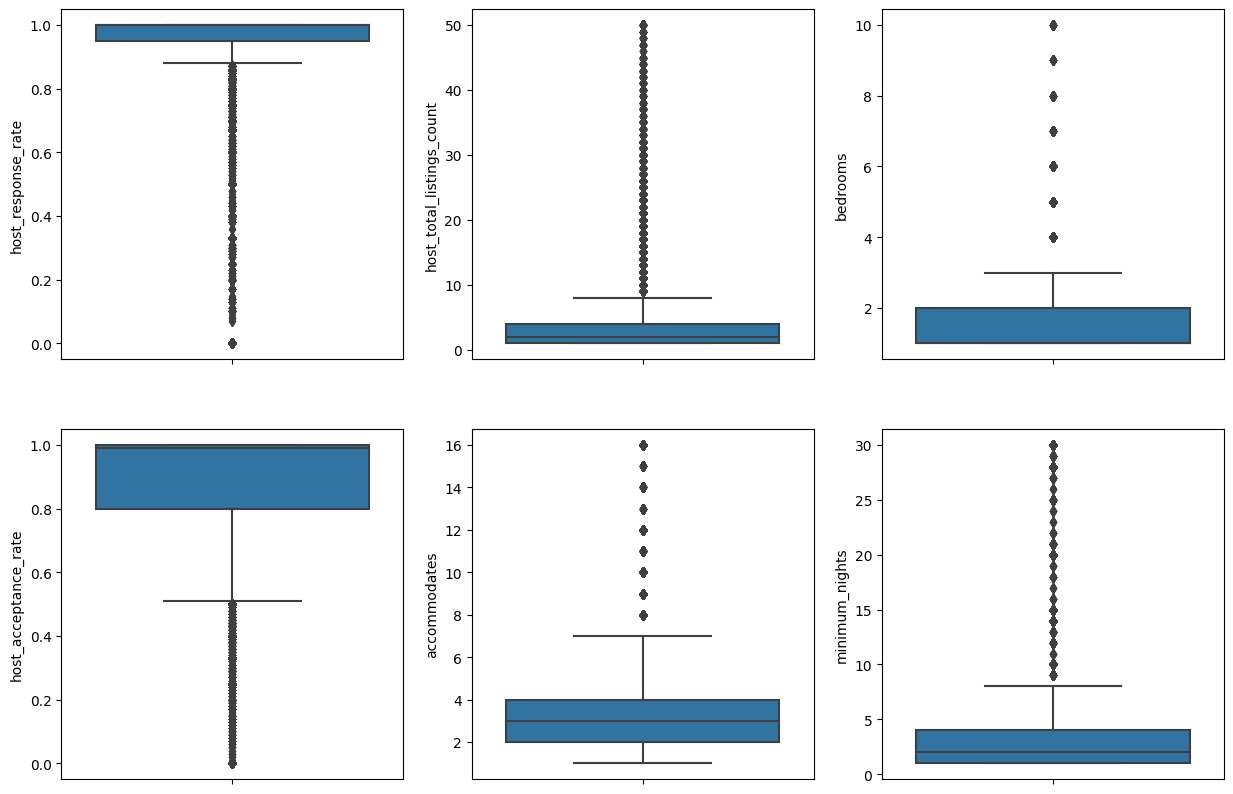

In [ ]:
fig, axs = plt.subplots(2, 3, figsize = (15, 10))

sns.boxplot(listings_sample, y = 'host_response_rate', ax=axs[0, 0])
sns.boxplot(listings_sample, y = 'host_acceptance_rate', ax=axs[1, 0])
sns.boxplot(listings_sample, y = 'host_total_listings_count', ax=axs[0, 1])
sns.boxplot(listings_sample, y = 'accommodates', ax=axs[1, 1])
sns.boxplot(listings_sample, y = 'bedrooms', ax=axs[0, 2])
sns.boxplot(listings_sample, y = 'minimum_nights', ax=axs[1, 2])


plt.show();

To address outliers within the 'usd_price' column, we again adopted a targeted approach by leveraging box plots for each city in the dataset. This involved setting individual thresholds based on the specific characteristics of each city's pricing distribution. Subsequently, values exceeding these city-specific thresholds were systematically identified and removed.

#### usd_price

<Axes: xlabel='city', ylabel='usd_price'>

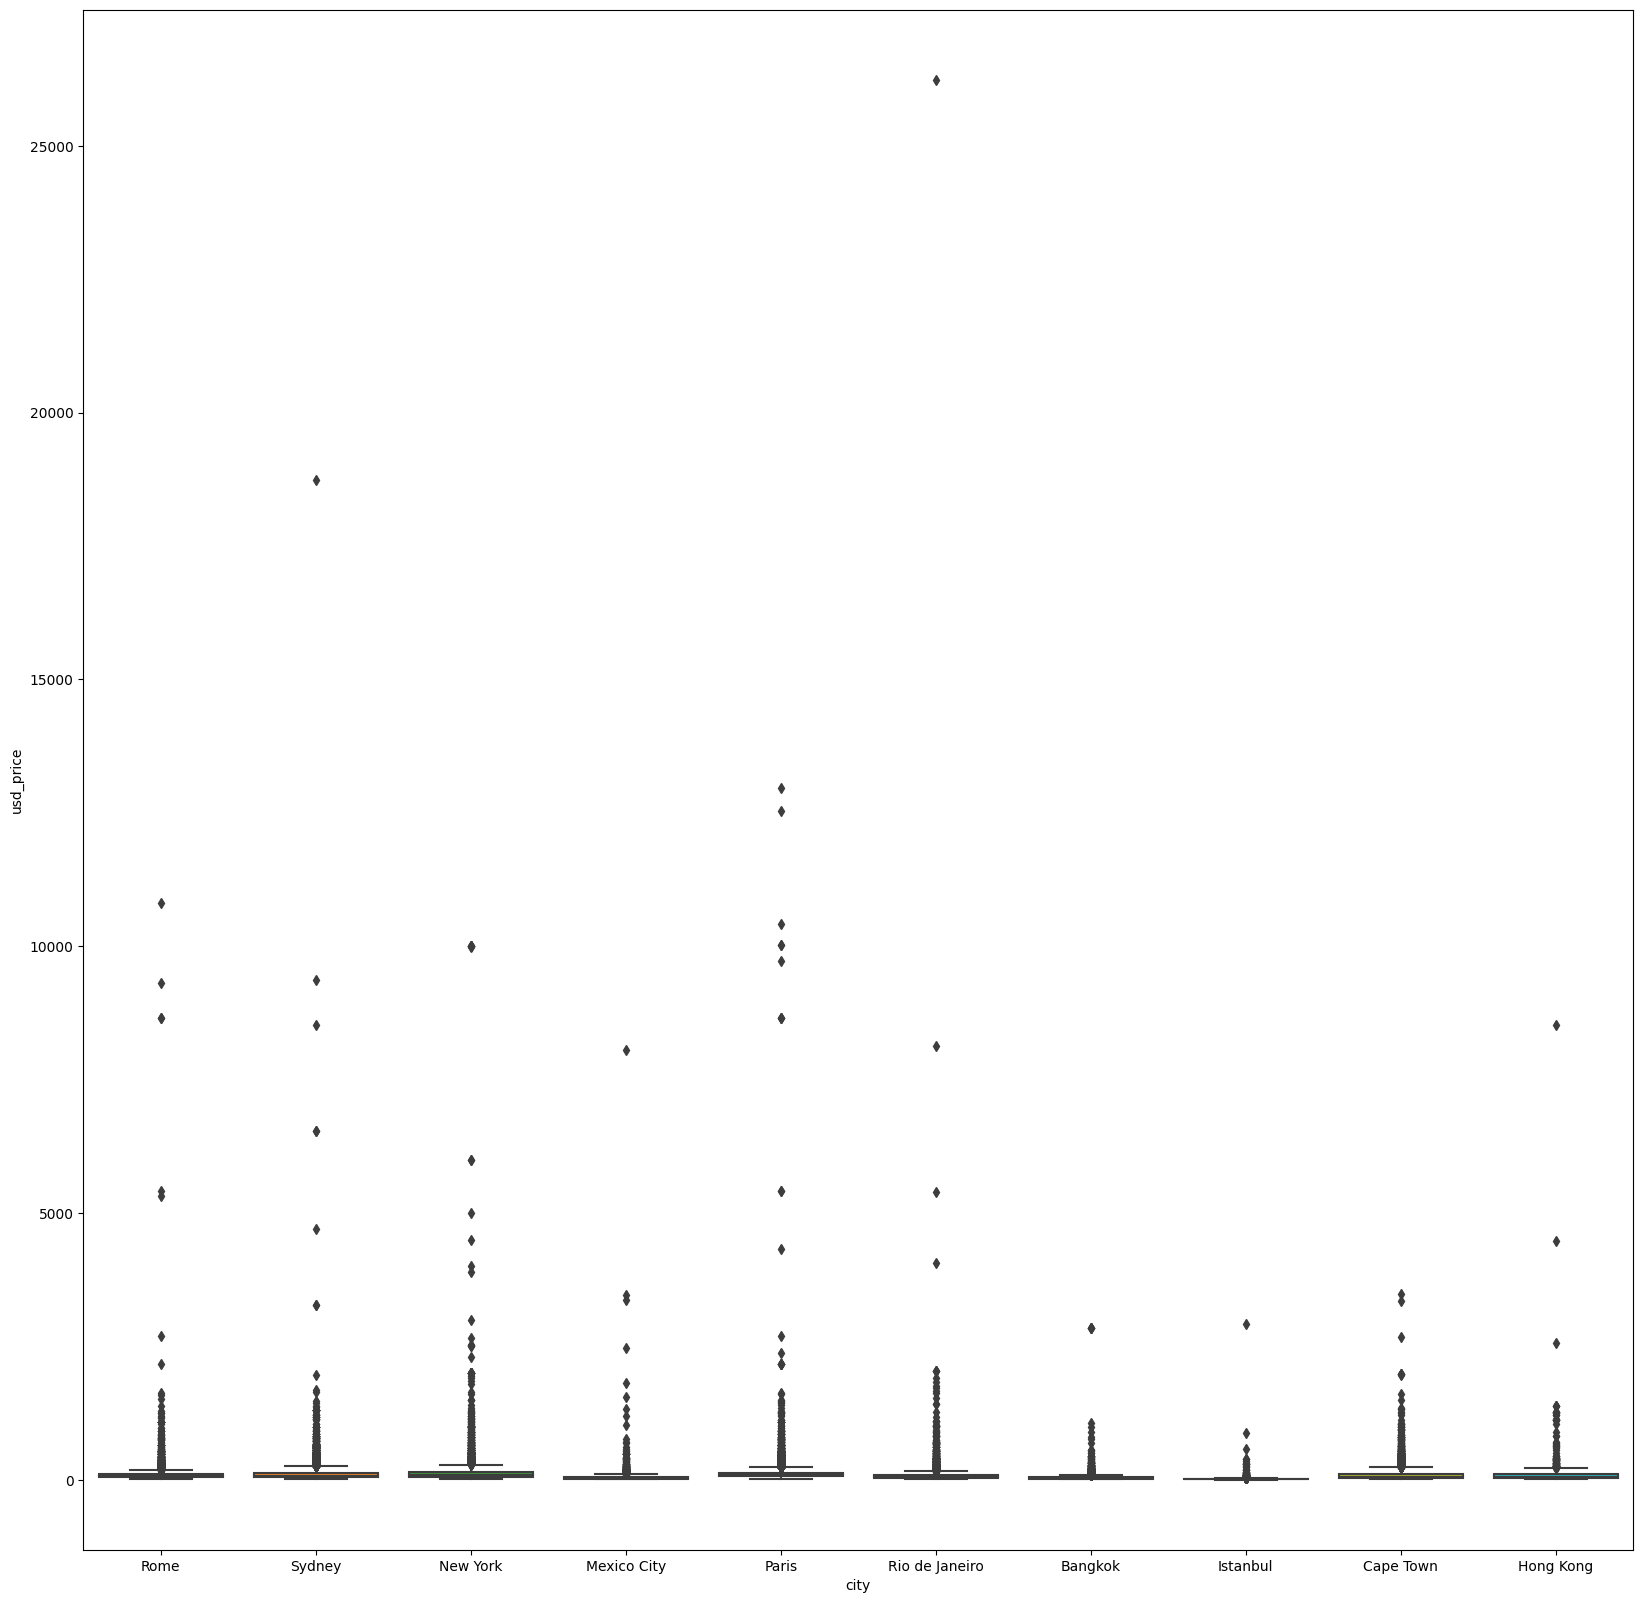

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(listings_sample, x= 'city', y = 'usd_price')

##### Bangkok

<Axes: ylabel='usd_price'>

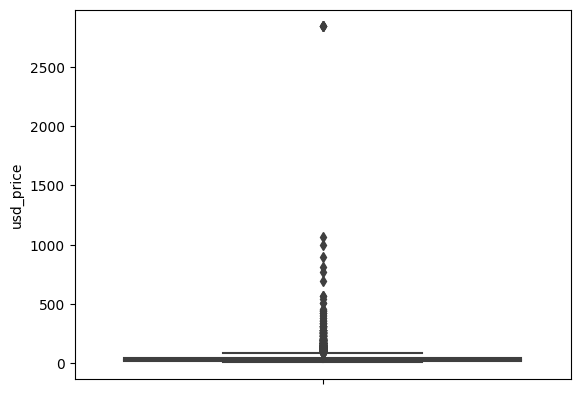

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Bangkok'], y = 'usd_price')

We're using 800 as a cut off after doing some domain research on the Airbnb website and seeing real and multiple listings around 800 US dollars.

In [ ]:
listings_sample[(listings_sample['city'] == 'Bangkok') & (listings_sample['usd_price'] > 800)]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days,usd_price
128577,within a day,0.7,1.00,t,10.0,t,t,Bangkok,13.71571,100.52084,...,9.8,10.0,10.0,10.0,10.0,9.0,10.0,f,2173,2838.800000
128461,a few days or more,0.0,NaN,f,1.0,t,t,Bangkok,13.72285,100.57643,...,9.2,9.0,8.0,10.0,10.0,10.0,10.0,t,1123,2838.800000
131093,within a day,0.7,1.00,t,10.0,t,t,Bangkok,13.71569,100.52095,...,9.6,9.0,10.0,10.0,9.0,9.0,9.0,f,2173,2838.800000
92370,within a day,0.7,1.00,t,10.0,t,t,Bangkok,13.71560,100.52094,...,9.8,10.0,10.0,10.0,10.0,9.0,10.0,f,2173,2838.800000
95668,within an hour,1.0,1.00,t,5.0,t,t,Bangkok,13.73616,100.55553,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,t,1152,809.455432
87743,within a few hours,1.0,0.75,t,1.0,t,t,Bangkok,13.72397,100.56843,...,9.0,9.0,9.0,9.0,9.0,9.0,8.0,f,2397,993.580000
92763,within a day,0.7,1.00,f,5.0,t,t,Bangkok,13.73598,100.59139,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,t,884,1060.689232
204901,within a few hours,1.0,NaN,t,3.0,t,t,Bangkok,13.73909,100.54667,...,9.7,10.0,10.0,10.0,10.0,10.0,9.0,f,904,899.672496


In [ ]:
# Dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Bangkok') & (listings_sample['usd_price'] <= 800) | (listings_sample['city'] != 'Bangkok')]

##### New York

<Axes: ylabel='usd_price'>

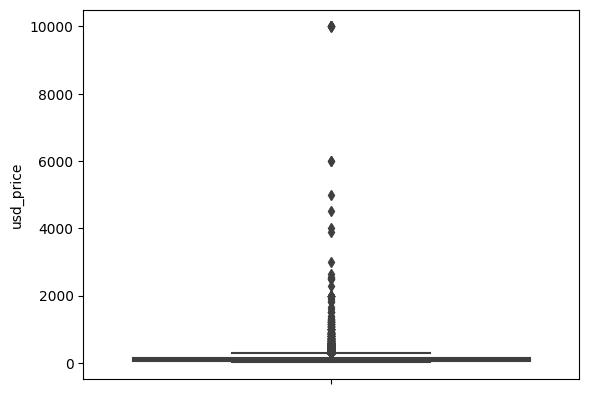

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='New York'], y = 'usd_price')

We're using 2000 as a cut off after doing some domain research on the Airbnb website and seeing real and multiple listings around 2000 US dollars.

In [ ]:
listings_sample[(listings_sample['city'] == 'New York') & (listings_sample['usd_price'] > 2000)]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days,usd_price
109612,a few days or more,0.00,1.00,f,11.0,t,t,New York,40.76227,-73.97450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1177,10000.0
109800,unknown,NaN,0.96,f,3.0,t,f,New York,40.72031,-73.98813,...,8.9,9.0,9.0,9.0,9.0,9.0,9.0,t,984,9999.0
86597,a few days or more,0.00,1.00,f,1.0,t,t,New York,40.73249,-73.99523,...,9.7,9.0,10.0,10.0,9.0,10.0,9.0,t,1589,3900.0
87095,within an hour,1.00,0.71,t,1.0,t,t,New York,40.67131,-73.94928,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2700,4000.0
78739,within a few hours,1.00,1.00,f,14.0,t,t,New York,40.77516,-73.98573,...,9.7,10.0,10.0,10.0,10.0,10.0,9.0,f,3820,2500.0
91574,within an hour,0.98,0.73,t,10.0,t,t,New York,40.69064,-73.96757,...,9.1,10.0,9.0,10.0,9.0,10.0,9.0,f,3758,4500.0
203439,within a day,1.00,0.40,t,3.0,t,t,New York,40.71812,-73.96185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2891,2500.0
212802,within an hour,1.00,0.85,t,1.0,t,t,New York,40.77904,-73.77251,...,9.5,9.0,9.0,9.0,10.0,10.0,9.0,f,639,2293.0
20130,unknown,NaN,NaN,f,1.0,t,t,New York,40.77782,-73.97848,...,9.3,9.0,9.0,10.0,10.0,10.0,9.0,f,3547,6000.0
202005,within an hour,1.00,1.00,t,2.0,t,t,New York,40.72668,-73.98179,...,9.8,10.0,9.0,10.0,10.0,10.0,9.0,f,3270,2536.0


In [ ]:
# Dropping all 19 rows

listings_sample = listings_sample[(listings_sample['city'] == 'New York') & (listings_sample['usd_price'] <= 2000) | (listings_sample['city'] != 'New York')]

##### Sydney

<Axes: ylabel='usd_price'>

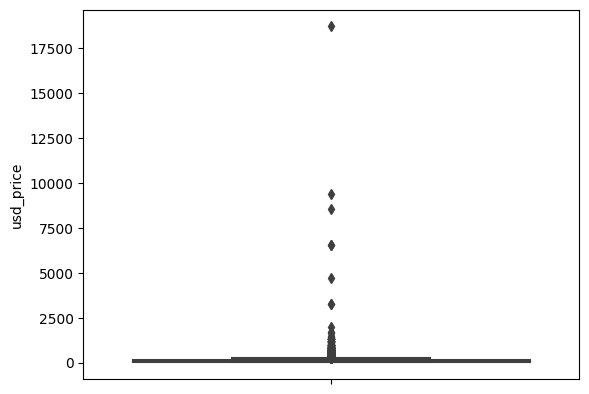

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Sydney'], y = 'usd_price')

We're using 3000 as a cut off after doing some domain research on the Airbnb website and seeing real and multiple listings around 3000 US dollars.

In [ ]:
listings_sample[(listings_sample['city'] == 'Sydney') & (listings_sample['usd_price'] > 3000)]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days,usd_price
135340,within a few hours,1.0,NaN,f,1.0,t,t,Sydney,-33.85890,151.18018,...,8.8,9.0,8.0,10.0,9.0,10.0,9.0,t,1671,4693.62540
198235,unknown,NaN,NaN,f,1.0,t,t,Sydney,-33.84803,151.07392,...,9.1,9.0,9.0,10.0,9.0,10.0,9.0,t,1489,8526.42550
178743,unknown,NaN,NaN,f,2.0,t,t,Sydney,-33.86515,151.19190,...,9.5,10.0,10.0,10.0,10.0,10.0,10.0,f,4615,9370.88530
215024,within an hour,1.0,NaN,t,1.0,t,t,Sydney,-33.88374,151.26369,...,10.0,10.0,10.0,10.0,10.0,10.0,8.0,f,976,3273.10000
173386,within an hour,1.0,1.00,f,6.0,t,t,Sydney,-33.88649,151.19422,...,2.0,2.0,2.0,8.0,2.0,4.0,2.0,t,1465,6546.20000
50100,unknown,NaN,0.94,f,2.0,t,t,Sydney,-33.82170,151.19593,...,9.4,10.0,9.0,9.0,9.0,10.0,9.0,f,1516,3273.10000
50030,unknown,NaN,0.94,f,2.0,t,t,Sydney,-33.88771,151.20790,...,8.7,9.0,8.0,9.0,9.0,9.0,9.0,t,1516,6546.20000
111113,unknown,NaN,NaN,f,2.0,t,t,Sydney,-33.88236,151.22962,...,9.0,10.0,8.0,10.0,10.0,9.0,9.0,f,2203,18730.64206


In [ ]:
# Dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Sydney') & (listings_sample['usd_price'] <= 3000) | (listings_sample['city'] != 'Sydney')]

##### Cape Town

<Axes: ylabel='usd_price'>

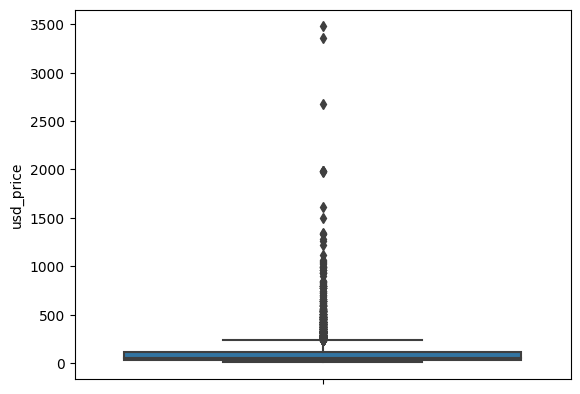

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Cape Town'], y = 'usd_price')

We're using 2000 as a cut off after doing some domain research on the Airbnb website and seeing real and multiple listings around 2000 US dollars.

In [ ]:
listings_sample[(listings_sample['city'] == 'Cape Town') & (listings_sample['usd_price'] > 2000)]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days,usd_price
216194,unknown,NaN,NaN,f,1.0,t,f,Cape Town,-33.94401,18.37794,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1488,3477.972755
93963,within an hour,1.0,0.01,f,31.0,t,t,Cape Town,-33.96192,18.37557,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,f,1740,3352.545000
216711,unknown,NaN,NaN,f,1.0,t,f,Cape Town,-34.03023,18.35217,...,9.3,10.0,10.0,10.0,10.0,9.0,9.0,f,2612,2675.703415


In [ ]:
# Dropping all 3 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Cape Town') & (listings_sample['usd_price'] <= 2000) | (listings_sample['city'] != 'Cape Town')]

##### Rome

<Axes: ylabel='usd_price'>

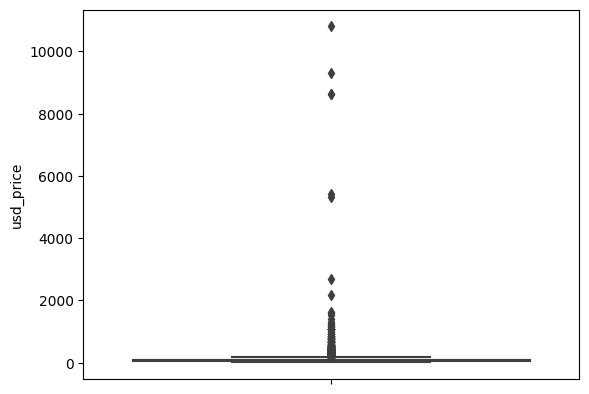

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Rome'], y = 'usd_price')

We're using 3000 as a cut off after doing some domain research on the Airbnb website and seeing real and multiple listings around 3000 US dollars.

In [ ]:
listings_sample[(listings_sample['city'] == 'Rome') & (listings_sample['usd_price'] > 3000)]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days,usd_price
246739,within an hour,1.0,1.0,t,2.0,t,t,Rome,41.89566,12.43828,...,9.9,10.0,10.0,10.0,10.0,9.0,10.0,t,1384,8646.4000
70673,within an hour,1.0,1.0,f,14.0,t,t,Rome,41.89668,12.51309,...,8.6,9.0,9.0,9.0,9.0,9.0,9.0,f,2038,9310.0112
246704,within a day,1.0,1.0,f,4.0,t,t,Rome,41.89690,12.44157,...,9.8,10.0,10.0,10.0,10.0,9.0,10.0,t,2983,5404.0000
260498,unknown,NaN,1.0,f,1.0,t,t,Rome,41.89394,12.48887,...,10.0,10.0,10.0,10.0,10.0,10.0,8.0,t,2052,10808.0000
76321,within an hour,1.0,1.0,f,4.0,t,t,Rome,41.87899,12.46261,...,9.8,10.0,10.0,10.0,10.0,10.0,10.0,t,2424,5317.5360
51951,unknown,NaN,1.0,t,2.0,t,t,Rome,41.89285,12.47654,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,t,1292,8646.4000


In [ ]:
# Dropping all 6 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Rome') & (listings_sample['usd_price'] <= 3000) | (listings_sample['city'] != 'Rome')]

##### Rio de Janeiro

<Axes: ylabel='usd_price'>

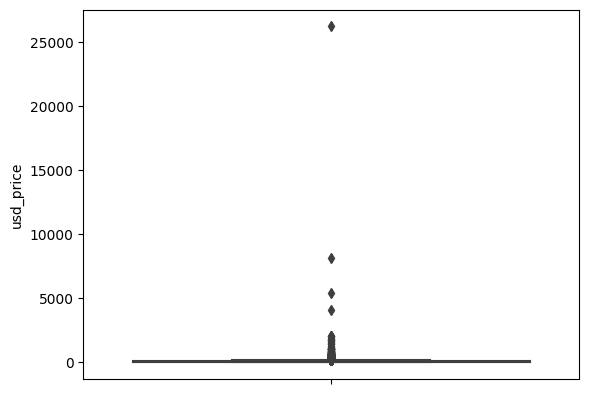

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Rio de Janeiro'], y = 'usd_price')

We're using 5000 as a cut off after doing some domain research on the Airbnb website and seeing real and multiple listings around 5000 US dollars.

In [ ]:
listings_sample[(listings_sample['city'] == 'Rio de Janeiro') & (listings_sample['usd_price'] > 5000)]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days,usd_price
260038,unknown,NaN,1.0,f,1.0,t,t,Rio de Janeiro,-22.98410,-43.19924,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1839,8131.20000
64485,within an hour,1.0,NaN,f,12.0,t,t,Rio de Janeiro,-22.98679,-43.20633,...,8.0,6.0,10.0,10.0,10.0,10.0,6.0,f,1691,26239.38240
265537,within an hour,1.0,1.0,f,1.0,t,f,Rio de Janeiro,-22.97810,-43.19258,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2968,5392.20528


In [ ]:
# Dropping all 3 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Rio de Janeiro') & (listings_sample['usd_price'] <= 5000) | (listings_sample['city'] != 'Rio de Janeiro')]

##### Paris

<Axes: ylabel='usd_price'>

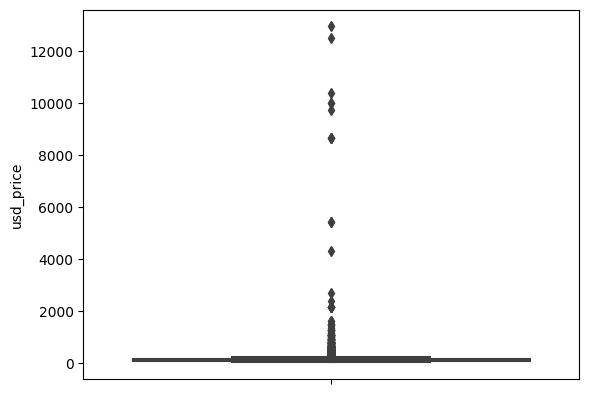

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Paris'], y = 'usd_price')

We're using 3000 as a cut off after doing some domain research on the Airbnb website and seeing real and multiple listings around 3000 US dollars.

In [ ]:
listings_sample[(listings_sample['city'] == 'Paris') & (listings_sample['usd_price'] > 3000)]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days,usd_price
36228,within an hour,0.67,0.90,f,1.0,t,t,Paris,48.83844,2.35790,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,t,2553,12969.6000
187291,within an hour,1.00,1.00,f,1.0,t,t,Paris,48.88260,2.37110,...,9.0,9.0,8.0,10.0,9.0,9.0,9.0,f,2373,5404.0000
92492,within an hour,0.75,1.00,f,8.0,t,t,Paris,48.86261,2.33929,...,9.0,10.0,10.0,10.0,10.0,10.0,10.0,t,1904,8646.4000
36624,a few days or more,0.00,NaN,f,2.0,t,t,Paris,48.88282,2.33687,...,8.9,9.0,8.0,10.0,10.0,9.0,9.0,f,2538,4323.2000
127838,a few days or more,0.00,NaN,f,1.0,t,f,Paris,48.85107,2.35692,...,6.0,5.0,7.0,6.0,5.0,9.0,6.0,t,854,5404.0000
28872,within an hour,1.00,NaN,f,1.0,t,f,Paris,48.86607,2.36264,...,9.2,10.0,9.0,10.0,9.0,10.0,9.0,t,591,10409.1848
269713,within a few hours,1.00,1.00,t,1.0,t,t,Paris,48.87444,2.35837,...,9.5,10.0,9.0,9.0,10.0,9.0,9.0,f,2811,8646.4000
60845,within an hour,1.00,0.95,f,5.0,t,t,Paris,48.87738,2.34482,...,9.0,9.0,9.0,9.0,10.0,10.0,9.0,t,1261,10029.8240
67375,within a day,1.00,NaN,f,2.0,t,t,Paris,48.84538,2.28960,...,10.0,10.0,9.0,10.0,10.0,10.0,10.0,f,2504,9727.2000
64147,within an hour,1.00,0.95,f,5.0,t,t,Paris,48.84951,2.37842,...,9.2,9.0,9.0,9.0,10.0,10.0,9.0,f,1261,10029.8240


In [ ]:
# Dropping all 12 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Paris') & (listings_sample['usd_price'] <= 3000) | (listings_sample['city'] != 'Paris')]

##### Istanbul

<Axes: ylabel='usd_price'>

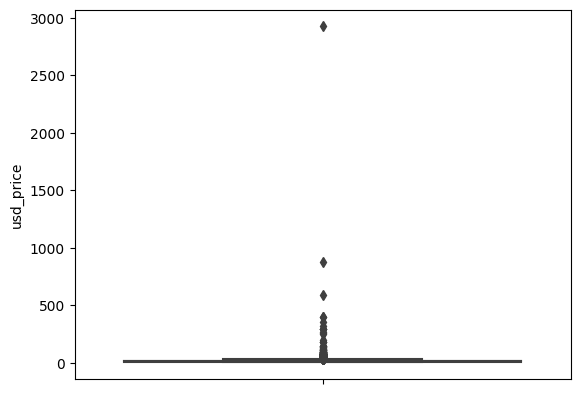

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Istanbul'], y = 'usd_price')

We're using 1000 as a cut off after doing some domain research on the Airbnb website and seeing real and multiple listings around 1000 US dollars.

In [ ]:
listings_sample[(listings_sample['city'] == 'Istanbul') & (listings_sample['usd_price'] > 1000)]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days,usd_price
246517,within a few hours,1.0,1.0,f,7.0,t,t,Istanbul,41.00384,28.97086,...,9.6,10.0,10.0,10.0,10.0,9.0,8.0,t,1848,2927.52096


In [ ]:
# Dropping the single row

listings_sample = listings_sample[(listings_sample['city'] == 'Istanbul') & (listings_sample['usd_price'] <= 1000) | (listings_sample['city'] != 'Istanbul')]

##### Mexico City

<Axes: ylabel='usd_price'>

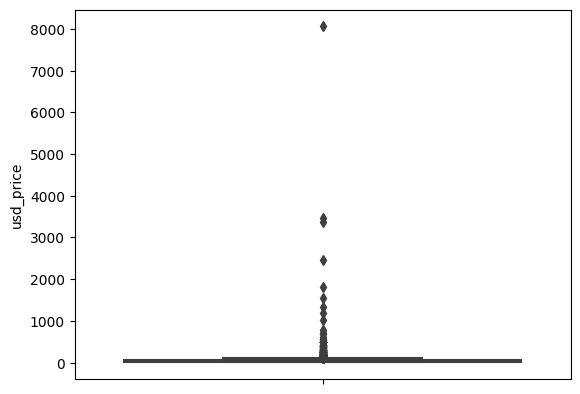

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Mexico City'], y = 'usd_price')

We're using 1500 as a cut off after doing some domain research on the Airbnb website and seeing real and multiple listings around 1500 US dollars.

In [ ]:
listings_sample[(listings_sample['city'] == 'Mexico City') & (listings_sample['usd_price'] > 1500)]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days,usd_price
230102,unknown,NaN,NaN,t,12.0,t,t,Mexico City,19.43095,-99.17799,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,t,1319,3461.3530
60914,within a few hours,1.0,0.98,f,5.0,t,t,Mexico City,19.43825,-99.19953,...,9.8,10.0,10.0,10.0,10.0,10.0,10.0,f,2172,8060.6486
252995,unknown,NaN,NaN,f,1.0,t,t,Mexico City,19.39443,-99.17394,...,9.8,10.0,10.0,10.0,10.0,10.0,10.0,f,2390,1547.3298
94332,within an hour,1.0,0.86,f,11.0,t,t,Mexico City,19.40176,-99.16663,...,9.0,10.0,9.0,10.0,10.0,10.0,10.0,f,3181,1817.9375
225627,a few days or more,0.0,1.00,f,2.0,t,f,Mexico City,19.44961,-99.15619,...,9.7,9.0,9.0,10.0,10.0,10.0,10.0,f,2396,3360.8303
160399,within an hour,1.0,1.00,f,2.0,t,t,Mexico City,19.43026,-99.19223,...,9.6,10.0,10.0,10.0,10.0,10.0,9.0,t,1492,2465.0000


In [ ]:
# Dropping all 6 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Mexico City') & (listings_sample['usd_price'] <= 1500) | (listings_sample['city'] != 'Mexico City')]

##### Hong Kong

<Axes: ylabel='usd_price'>

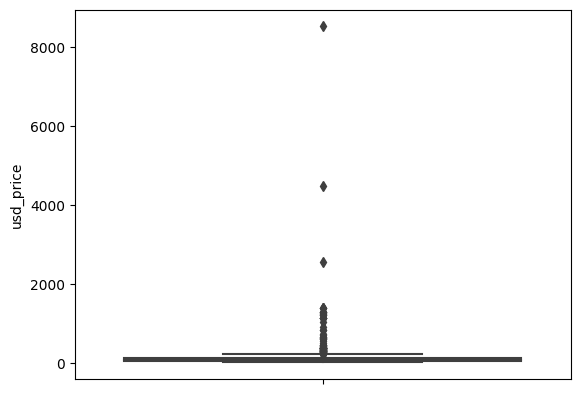

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Hong Kong'], y = 'usd_price')

We're using 1000 as a cut off after doing some domain research on the Airbnb website and seeing real and multiple listings around 1000 US dollars.

In [ ]:
listings_sample[(listings_sample['city'] == 'Hong Kong') & (listings_sample['usd_price'] > 1000)]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days,usd_price
147355,unknown,NaN,NaN,f,6.0,t,t,Hong Kong,22.29944,114.17162,...,8.9,9.0,9.0,10.0,9.0,10.0,9.0,t,1712,1124.24823
128269,a few days or more,0.00,NaN,f,3.0,t,f,Hong Kong,22.33011,114.16138,...,10.0,8.0,10.0,10.0,8.0,10.0,10.0,t,1820,4471.95000
53864,unknown,NaN,NaN,f,3.0,t,f,Hong Kong,22.31829,114.16856,...,8.2,8.0,8.0,9.0,9.0,10.0,9.0,f,1496,1044.00867
92343,within a few hours,0.80,0.00,f,2.0,t,t,Hong Kong,22.39783,114.10876,...,8.0,10.0,7.0,10.0,10.0,8.0,7.0,f,2586,1277.70000
147828,unknown,NaN,NaN,f,5.0,t,t,Hong Kong,22.29558,114.17324,...,5.7,6.0,6.0,7.0,7.0,7.0,7.0,f,2067,1277.57223
148095,unknown,NaN,NaN,f,6.0,t,t,Hong Kong,22.29762,114.17148,...,9.3,10.0,9.0,10.0,10.0,10.0,10.0,t,1712,1124.24823
219154,within an hour,0.95,0.99,f,17.0,t,t,Hong Kong,22.29518,114.17356,...,9.2,8.0,9.0,10.0,10.0,10.0,9.0,t,3485,1135.61976
45597,a few days or more,0.20,0.82,f,7.0,t,t,Hong Kong,22.30404,114.17080,...,9.1,10.0,9.0,10.0,9.0,10.0,9.0,f,2223,1253.16816
216709,unknown,NaN,NaN,f,1.0,t,t,Hong Kong,22.20439,114.03607,...,9.9,10.0,10.0,10.0,10.0,9.0,9.0,f,795,1244.86311
30540,within a day,1.00,NaN,f,1.0,t,t,Hong Kong,22.27587,114.15922,...,9.6,10.0,10.0,10.0,10.0,10.0,9.0,t,1422,1375.82736


In [ ]:
# Dropping all 19 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Hong Kong') & (listings_sample['usd_price'] <= 1000) | (listings_sample['city'] != 'Hong Kong')]

## Preprocessing

---



First, we split our data into training and testing data. To prevent data leakage during preprocessing, we do not apply any transformations on the test data. This was particularly important during imputation for missing values. We picked a threshold of 30-70 split for test and training data to manage overfitting within the training data and improve generalization error of our models.

In [ ]:
# Splitting the data into training and test sets to estimate generalization error

from sklearn.model_selection import train_test_split

X = listings_sample.drop("usd_price", axis=1)
y = listings_sample["usd_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((53846, 24), (23078, 24), (53846,), (23078,))

Next, we built our preprocessing pipeline to transform our training data for our models. Within this pipeline, we applied IterativeImputer for numerical columns with missing values, and then standardized these columns using StandardScaler. For categorical columns, we created dummy columns by applying OneHotEncoding to treat each category as a separate feature within our models.

In [ ]:
# Building preprocessing pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn import set_config
set_config(display='diagram')

num_pipeline = make_pipeline(IterativeImputer(random_state = 42, max_iter = 100), StandardScaler())

# Dropping amenities for now

preprocess_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(drop="first", sparse_output=False), make_column_selector(dtype_include=object)),
        ("num", num_pipeline, make_column_selector(dtype_include=np.number)),
    ])
preprocess_pipeline.set_output(transform='pandas')

preprocess_pipeline

ColumnTransformer(transformers=[('cat',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c4c8b743df0>),
                                ('num',
                                 Pipeline(steps=[('iterativeimputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c4c8a080be0>)])

## Base Models

After preprocessing our data, we begin fitting our models on this transformed data. First, we tried Linear Regression as our base model for comparison.

### Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score as sklearn_r2_score

In [ ]:
# Fitting Linear Regression model on our training data

from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocess_pipeline, LinearRegression())
lin_reg.fit(X_train, y_train)

# Predicting with our fitted model
y_train_predictions = lin_reg.predict(X_train)

# Calculating RMSE for training data
lin_rmse = mean_squared_error(y_train, y_train_predictions, squared=False)
print(f"The training data RMSE is {lin_rmse:.0f} or about {(lin_rmse/y_train.mean()*100):.0f}% error")

The training data RMSE is 97 or about 101% error


In [ ]:
# Calculating R-squared score for training data

print(f'R-squared score from Linear Regression model is {r2_score(y_train, y_train_predictions):.3f}')

R-squared score from Linear Regression model is 0.355


In [ ]:
# Calculating the mean target variable value

listings_sample['usd_price'].mean()

95.65896843578076

We fit a base linear regression model on our training data and our root-mean-square error was USD97 or about 101% error from the mean price of USD95. Our R-squared score was 0.355, which means that our model was able to capture about 35% of the variance within our data.

In [ ]:
# Predicting with our fitted model
y_pred = lin_reg.predict(X_test)

# Calculating RMSE for test data
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"The test data RMSE is {test_rmse:.0f} or about {(test_rmse/y_test.mean()*100):.0f}% error")

The training data RMSE is 94 or about 98% error


In [ ]:
# Calculating R-squared score for test data

print(f'R-squared score from Linear Regression model is {r2_score(y_test, y_pred):.3f}')

R-squared score from Linear Regression model is 0.368


Next, we tested the generalization error of our model by predicting on our test data. Our RMSE improved slightly to USD94 (98% error) and our R-squared also increased to 0.368. This result was interesting because we generally expect the model to do worse on the test data. So, we decided to apply k-fold cross validation on our training data to further investigate this.

In [ ]:
# Checking out of sample prediction for our model with cross-validation

from sklearn.model_selection import cross_val_score

lin_cv_rmses = -cross_val_score(lin_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=5)

print(f"Average Linear Regression Cross-Validation RMSE: {lin_cv_rmses.mean():.0f}")

Average Linear Regression Cross-Validation RMSE: 95


From this cross-validation, we got an average RMSE of USD95. This tells us that the decrease in test data error was likely due to random chance or underfitting by our model. Therefore, at this time we presume that there is a non-linear relationship within price in our data that a simple linear regression model is not able to capture. So, we move on to more advanced techniques below.

### Decision Tree Regression

Moving onto non-linear boundary separating approaches, we decided to try using Decision Trees to see if our data would be better predicted. Decision tree models partition the data by the X or feature values repeatedly, predicting one value for all of the points that eventually fall in the same region. Since we are approaching a regression problem, the model will take the average of all values in that region.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Making Decision Tree pipeline
tree_reg = make_pipeline(preprocess_pipeline, DecisionTreeRegressor(random_state=42))

# Fitting on training data
tree_reg.fit(X_train, y_train)

# Making predictions on training data
y_train_predictions = tree_reg.predict(X_train)

# Calculating RMSE for training data
tree_rmse = mean_squared_error(y_train, y_train_predictions, squared=False)
print(f'Training data RMSE for Decision Tree model is {tree_rmse:.0f}')

Training data error for the tree 2


In [ ]:
#from sklearn.metrics import r2_score

print(f'R-squared score from Decision Tree model on training data is {r2_score(y_train, y_train_predictions):.3f}')

R-squared score from Decision Tree model is 1.000


In [ ]:
print(f'R-squared score from Decision Tree model on test data is {r2_score(y_test, tree_reg.predict(X_test)):.3f}')

R-squared score from Decision Tree model is 0.007


In [ ]:
# Checking out of sample prediction for our model with cross-validation

tree_cv_rmses = -cross_val_score(tree_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=5)
print(f"Average Decision Tree Regression Cross-Validation RMSE: {tree_cv_rmses.mean():.0f}")

Average Decision Tree Regression Cross-Validation RMSE: 127


From the above results, we can see that the full Decision Tree model is definitely overfitting to the training data, where it is making almost no errors with the training data yet making large errors with the test data. This is likewise reflected in the R-squared score, with training data having a very high R-squared score (in fact, it has a 'perfect' R-squared score of 1.000, which is unreasonably high) and test data having a very low score (0.007). We see the same pattern in the RMSE where the error for the test set is USD127 yet the error for the training set is only USD2. This overfitting can be explained as we fitted a full tree to the data and did not set any limitations at all in terms of model complexity, max depth of the tree, or any limitations to the nodes and leaves.

To combat the overfitting issues and to cut back on our tree, we will try two techniques. First, we will try to tune the hyperparameters of our tree to limit maximum depth and the minimum amount of samples a leaf must end up with. Next, we will attempt cost complexity pruning by varying the alpha values.

#### Hyperparameter Tuning

Due to computational power limitations, we performed hyperparameter search using random search.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#Setting up and checking the parameter grid
param_grid = [
    {'decisiontreeregressor__max_depth': [16, 17, 18, 19, 20, 21, 22, 23, 24],
     'decisiontreeregressor__min_samples_leaf': [15, 16, 17, 18, 19, 20, 21, 22, 23]}]

# Creating the RandomSearchCV object
random_search = RandomizedSearchCV(tree_reg, param_grid, cv=3, n_iter=50, random_state=42, scoring='neg_root_mean_squared_error')

# Fitting the random search to training data
random_search.fit(X_train, y_train)

# Displaying the results
rand_search_res = pd.DataFrame(random_search.cv_results_).sort_values(by='mean_test_score', ascending=False).head()
rand_search_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeregressor__min_samples_leaf,param_decisiontreeregressor__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
32,2.771294,0.551745,0.131261,0.018036,22,16,{'decisiontreeregressor__min_samples_leaf': 22...,-93.223146,-95.999917,-97.947646,-95.723570,1.938642,1
44,2.342514,0.319382,0.120308,0.005576,23,16,{'decisiontreeregressor__min_samples_leaf': 23...,-93.563387,-95.877624,-97.910804,-95.783939,1.776061,2
37,2.909203,0.387223,0.126487,0.003918,22,18,{'decisiontreeregressor__min_samples_leaf': 22...,-93.392816,-96.104548,-98.012892,-95.836752,1.895620,3
28,2.463265,0.305162,0.120248,0.005444,22,17,{'decisiontreeregressor__min_samples_leaf': 22...,-93.314240,-96.138333,-98.106259,-95.852944,1.966714,4
24,3.077129,0.138552,0.148919,0.025118,22,19,{'decisiontreeregressor__min_samples_leaf': 22...,-93.428612,-96.122409,-98.105102,-95.885374,1.916512,5


We found that the best model had 22 minimum samples in the leaf and a max depth of 16. Fitting this model back to our data, our results are as follows.

In [ ]:
# Getting the best pair of hyperparameters from our GridSearch
best_tree = random_search.best_estimator_

# Fitting on our training data with these hyperparameters
best_tree.fit(X_train, y_train)

# Calculating R-squared for training data
print(f'R-squared score from tuned Decision Tree model on training data is {r2_score(y_train, best_tree.predict(X_train)):.3f}')

R-squared score from tuned Decision Tree model on training data is 0.482


In [ ]:
# Calculating R-squared for test data

print(f'R-squared score from tuned Decision Tree model on test data is {r2_score(y_test, best_tree.predict(X_test)):.3f}')

R-squared score from tuned Decision Tree model on test data is 0.363


In [ ]:
# Making predictions on training data
y_train_predictions = best_tree.predict(X_train)

# Calculating RMSE for training data
best_tree_rmse = mean_squared_error(y_train, y_train_predictions, squared=False)
print(f'Training data RMSE for Decision Tree model is {best_tree_rmse:.0f}')

Training data RMSE for Decision Tree model is 85


In [ ]:
# Making predictions on test data
y_test_predictions = best_tree.predict(X_test)

# Calculating RMSE for test data
best_tree_rmse = mean_squared_error(y_test, y_test_predictions, squared=False)
print(f'Test data RMSE for Decision Tree model is {best_tree_rmse:.0f}')

Test data RMSE for Decision Tree model is 94


We can see that the R-squared values stabilized for both, with training data still performing a little better than testing data, but to a reasonable extend. RMSE values are also more reasonable with what one would expect, with the training data only outperforming the test data's errors by USD9. This reflects a reasonably well fitted model that is a much better option than the untuned Decision Tree model.

#### Cost Complexity Pruning

Another option to prevent overfitting is to prune the tree by adding a penalty for complexity in the model. With hyperparameter tuning, there is a risk that we will be prematurely stopping the tree with the parameters we choose and hence result in underfitting. Cost complexity pruning will be able to prevent this limitation by penalizing overly complex trees. First, a full tree is grown, and then two split leaves may be merged back into their parent node. The nodes remain split if the reduction in impurity is greater than the penalty amount we have set, also known as the alpha. Theorectically, to find the optimal penalty amount to apply, we should run through the alpha ranges of the tree with a CV search method to find the value that will result in the best performing tree.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
X_train_prepd = preprocess_pipeline.fit_transform(X_train)
X_test_prepd = preprocess_pipeline.transform(X_test)

clf_full = DecisionTreeRegressor()
path = clf_full.cost_complexity_pruning_path(X_train_prepd, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(f'There are {ccp_alphas.shape[0]} alpha values.')

There are 44594 alpha values.


However, we have a very high amount of alpha values from our data. This, coupled with computational limitations, means it was infeasible for us to search through a decent representation of the alpha values for the best performing one. Nevertheless, we gave it a shot with Random Search, however only with 100 iterations.

In [ ]:
# First we tried to use Randomized Search CV to go through the alphas

from sklearn.model_selection import RandomizedSearchCV

param_grid = {'ccp_alpha': ccp_alphas}

random_search = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), param_grid, n_iter=100, cv=3, scoring='neg_mean_squared_error')

random_search.fit(X_train_prepd, y_train)

# Display
random_cv_res = pd.DataFrame(random_search.cv_results_)
random_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
display(random_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head())
best_tree = random_search.best_estimator_
print(f'The total number of nodes is {best_tree.tree_.node_count} and the max depth is {best_tree.tree_.max_depth}.')

,param_ccp_alpha,mean_test_score
31,2.66627,-13500.084892
52,0.606238,-14657.708664
15,0.371633,-14893.577858
16,0.198787,-15110.066963
80,0.182634,-15139.607773


The total number of nodes is 1313 and the max depth is 23.


In [ ]:
# Fitting on our training data with these hyperparameters
best_tree.fit(X_train_prepd, y_train)

# Calculating R-squared for training data
print(f'R-squared score from tuned Decision Tree model on training data is {r2_score(y_train, best_tree.predict(X_train_prepd)):.3f}')

R-squared score from tuned Decision Tree model on training data is 0.790


In [ ]:
# Calculating R-squared for test data

print(f'R-squared score from tuned Decision Tree model on test data is {r2_score(y_test, best_tree.predict(X_test_prepd)):.3f}')

R-squared score from tuned Decision Tree model on test data is 0.177


As we can see, even though the model improved, it was not by much, and hyperparameter tuning from earlier yielded much more stable results. We also tried Halving Search, but it was too computationally expensive to complete. Hence, due to computational limitations and a large alpha range, cost complexity pruning was not very effective for us, and we conclude that the best Random Forest model for us so far is the one with tuned hyperparameters.


 Given the performance of our models thus far, we then decided to try some ensemble methods to more efficiently process our data.

### Random Forest

---

First, we decided to try a bagging ensemble method, Random Forest. Random Forest regressors uses many decision tree models, where each base estimator is trained on a different bootstrap sample with the same size as the training set. Additionally, at each node, different subsets of features are considered without replacement. The predictions of each weak learner is then combined to output a final result.

In [ ]:
#Random Forest Model

from sklearn.ensemble import RandomForestRegressor

# Creating Random Forest pipeline
rf_reg = make_pipeline(preprocess_pipeline, RandomForestRegressor(random_state=42, n_estimators=100))

# Fitting pipeline on training data
rf_reg.fit(X_train, y_train)

# Making predicitons on training data
y_train_predictions = rf_reg.predict(X_train)

# Calculating RMSE for training data
tree_rmse = mean_squared_error(y_train, y_train_predictions, squared=False)
print(f'Training data RMSE for Random Forest is {tree_rmse:.0f}')

Training data RMSE for Random Forest is 35


In [ ]:
# Calculating R-squared for training data

print(f'Training data R-squared score from Random Forest model is {r2_score(y_train, y_train_predictions):.3f}')

Training data R-squared score from Random Forest model is 0.918


In [ ]:
# Making predicitons on training data
y_pred = rf_reg.predict(X_test)

# Calculating RMSE for training data
tree_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Test data RMSE for Random Forest is {tree_rmse:.0f}')

Test data RMSE for Random Forest is 86


In [ ]:
# Calculating R-squared for test data

print(f'R-squared for test data from Random Forest model is {r2_score(y_test, y_pred):.3f}')

R-squared for test data from Random Forest model is 0.468


As expected, we see that Random Forest performs a lot better than the base decision tree and better to a lesser extent than the hyperparameter optimized decision tree. A key thing to note here is that the R squared performance is a lot higher on the training test (0.918) than the test set (0.468) for Random Forest, in line with how the error in the training set is a lot smaller at 35 than the test set which came in at 86. This suggests that the model might be overfitting, as it is performing very well with the training data and no where near as well for the testing data. This may be because the model is fitting too well to noise in the training data and hence does not actually reflect trends in the dataset.

 We will try to reduce these overfitting concerns by hyperparameter tuning. Specifically, we will try increasing the number of n_estimator, which is the number of trees in the model, limiting the max depth of the model, varying the max_features, and increasing the number of min_samples_leaf.

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

#Setting up and checking the parameter grid
param_grid = [
    {'randomforestregressor__n_estimators': [100, 200, 300, 400],
    'randomforestregressor__max_features': ['log2','sqrt'],
    'randomforestregressor__max_depth': [18, 19, 20, 21, 22],
    'randomforestregressor__min_samples_leaf': [14, 15, 16, 17, 18]}]

# Creating the GridSearchCV object
randsearch = RandomizedSearchCV(rf_reg, param_grid, cv=3, n_iter=150, random_state=42, scoring='neg_root_mean_squared_error')

# Fitting the grid search to training data
randsearch.fit(X_train, y_train)

# Displaying the results
ran_search_res = pd.DataFrame(randsearch.cv_results_).sort_values(by='mean_test_score', ascending=False).head()
ran_search_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__n_estimators,param_randomforestregressor__min_samples_leaf,param_randomforestregressor__max_features,param_randomforestregressor__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
11,16.282020,0.285390,1.014578,0.022734,300,14,sqrt,22,"{'randomforestregressor__n_estimators': 300, '...",-90.533223,-92.144133,-94.786284,-92.487880,1.753236,1
140,6.710526,0.436968,0.439456,0.009525,100,14,sqrt,22,"{'randomforestregressor__n_estimators': 100, '...",-90.564308,-92.156438,-94.759840,-92.493529,1.729324,2
102,16.344168,0.324460,1.023880,0.015847,300,14,sqrt,21,"{'randomforestregressor__n_estimators': 300, '...",-90.627414,-92.264985,-94.858292,-92.583563,1.741877,3
48,21.117672,0.513924,1.310308,0.004662,400,14,sqrt,21,"{'randomforestregressor__n_estimators': 400, '...",-90.638633,-92.254643,-94.879804,-92.591027,1.747712,4
91,11.550739,0.259020,0.748289,0.009829,200,14,sqrt,21,"{'randomforestregressor__n_estimators': 200, '...",-90.646319,-92.290660,-94.901710,-92.612897,1.752135,5


In [ ]:
# Fitting the best tree with the best hyperparameters
best_tree = randsearch.best_estimator_

# Fitting on our training data with this model
best_tree.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f10da124d30>),
                                                 ('num',
                                                  Pipeline(steps=[('iterativeimputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f10da124670>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=22, max_features='sqrt',
                                       min_samples_leaf=14, n_estimators=300,
                                       random_state=42))])

In [ ]:
# Calculating RMSE for training data
print(f'RMSE score from tuned Decision Tree model on training data is {mean_squared_error(y_train, best_tree.predict(X_train), squared=False):.3f}')

RMSE score from tuned Decision Tree model on training data is 86.473


In [ ]:
# Calculating RMSE for training data
print(f'RMSE score from tuned Decision Tree model on test data is {mean_squared_error(y_test, best_tree.predict(X_test), squared=False):.3f}')

RMSE score from tuned Decision Tree model on test data is 90.670


In [ ]:
# Calculating R-squared for training data

print(f'Training data R-squared score from Random Forest model is {r2_score(y_train, best_tree.predict(X_train)):.3f}')

Training data R-squared score from Random Forest model is 0.461


In [ ]:
# Calculating R-squared for training data

print(f'Test data R-squared score from Random Forest model is {r2_score(y_test, best_tree.predict(X_test)):.3f}')

Test data R-squared score from Random Forest model is 0.405


Due to computational limitations, the results of hyperparameter tuning are not as promising as hoped, and we could not cycle through as many options as we want. We see that the overfitting has been greatly reduced with gaps between the R square scores for training and testing data reducing meaningfully. However, we see that the error for this model increased for test data when compared to the original Random Forest model, and the R squared value went down as well.

This means that while hyperparameter tuning has reduced the overfitting, the model also underperforms slightly compared to the original Random Forest Model, suggesting that the trends in the data are still not being fully captured. Other more sophisticated modelling techniques may be needed to remedy this problem, or we need more data to provide more information, or the data is simply too varied to be predicted. We will expand upon this further in our conclusion, but thusfar we believe that our models are underperforming due to high variance in our data as a result of the dataset containing detailed information on multiple cities.

### Gradient Boost Regression

Gradient Boosting is a machine learning ensemble technique that combines the predictions of several weak learners to create a strong predictive model sequentially, where each iteration learns from the previous models, focusing especially on the data records that were predicted poorly. This makes it more computationally efficient than bagging ensemble methods but also makes it more prone to over fitting.

In [ ]:
# preprocess the training data
tr_X = preprocess_pipeline.fit_transform(X_train)
tr_y = y_train

# preprocess the test data
t_X = preprocess_pipeline.transform(X_test)
t_y = y_test

# check sizes
X_train.shape, tr_X.shape, tr_y.shape, t_X.shape, t_y.shape

((53846, 24), (53846, 46), (53846,), (23078, 46), (23078,))

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Creating a HistGradientBoostingRegressor with specified hyperparameters
hgb_clf = HistGradientBoostingRegressor(max_leaf_nodes=17, max_iter=98, learning_rate=0.12796271206042764)  # λ

# Fitting the regressor model on the training data
hgb_clf.fit(tr_X, tr_y)

# Printing the R2 score to evaluate the performance of the gradient boosting model on the training data
print(f'Gradient boosting with {hgb_clf.max_iter} trees leads to R2 score of {hgb_clf.score(tr_X, tr_y):.4f} on the training data.')

Gradient boosting with 98 trees leads to R2 score of 0.5349 on the training data.


For our Gradient Boosting model the R squared of training data is 0.5349, which means that the model explains around 53% of the variance in the data around its mean.  

In [ ]:
# Calculating R-squared for test data

print(f'R-squared for test data from Gradient Boost model is {r2_score(t_y, y_pred):.3f}')

R-squared for test data from Gradient Boost model is 0.447


The R squared of testing data is also high compared to our other models at 0.447, which is good as it is not very much lower than that of the training data, suggesting there's not a lot of over fitting, especially when compared to earlier models like Random Forest where training and test R squared had a huge difference.

In [ ]:
# Making predicitons on training data
y_train_pred = hgb_clf.predict(tr_X)

# Calculating RMSE for training data
gb_train_rmse = mean_squared_error(tr_y, y_train_pred, squared=False)
print(f'RMSE for Gradient Boost on training data is {gb_train_rmse:.0f}')

# Making predicitons on test data
y_pred = hgb_clf.predict(t_X)

# Calculating RMSE for test data
gb_rmse = mean_squared_error(t_y, y_pred, squared=False)
print(f'RMSE for Gradient Boost on test data is {gb_rmse:.0f}')

RMSE for Gradient Boost on training data is 80
RMSE for Gradient Boost on test data is 87


A training RMSE of 80 suggests that the model is performing reasonably well on the training data in comparison to other models we've tried so far.
A test RMSE of 87, which is higher than the training RMSE, reflects our previous inference that overfitting is not occuring, at least not to a large extent. Given the mean price of the entire dataset is 95, this is not the ideal error to have. However, as RMSE is sensitive to large outliers in the data, this large error could be attributed to the nature of our dataset and our target variable, where different cities have difference price ranges that vary greatly, creating outliers despite outlier treatment.

To further improve the model, we performed hyperparameter tuning with Random Search CV below.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, loguniform
from sklearn.ensemble import HistGradientBoostingRegressor

# Define the parameter grid for hyperparameter tuning
param_grid = {'max_leaf_nodes': randint(10, 25),
              'max_iter': randint(50, 100),
              'learning_rate': loguniform(1e-2, 2e-1)}

# Create the HistGradientBoostingRegressor
hgb_clf = HistGradientBoostingRegressor(random_state=42)

# Set up RandomizedSearchCV
rand_search = RandomizedSearchCV(hgb_clf, param_distributions=param_grid,
                                 cv=5, n_iter=100, scoring='r2', random_state=42)

# Fit the model with the training data
rand_search.fit(tr_X, tr_y)

# Print the best hyperparameters
print("Best Hyperparameters:", rand_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = rand_search.best_estimator_
r2_score = best_model.score(t_X, t_y)
print(f'R2 score on the test set: {r2_score:.4f}')

Best Hyperparameters: {'learning_rate': 0.18043311207136256, 'max_iter': 99, 'max_leaf_nodes': 19}
R2 score on the test set: 0.4562


In [ ]:
# Calculating R-squared for training data

y_train_pred = best_gbtree.predict(tr_X)

print(f'R-squared for training data from Gradient Boost model is {sklearn_r2_score(tr_y, y_train_pred):.3f}')

R-squared for training data from Gradient Boost model is 0.565


After performing hyperparameter tuning, we can see that R squared increased by a minor amount for both training and testing data.

In [ ]:
# Getting the best pair of hyperparameters from our random search
best_gbtree = rand_search.best_estimator_

# Fitting on our training data with these hyperparameters
best_gbtree.fit(tr_X, tr_y)

y_train_pred = best_gbtree.predict(tr_X)

# Calculating RMSE for training data
gb_train_rmse = mean_squared_error(tr_y, y_train_pred, squared=False)
print(f'RMSE for Gradient Boost on training data is {gb_train_rmse:.0f}')

# Making predicitons on test data
y_pred = best_gbtree.predict(t_X)

# Calculating RMSE for test data
gb_rmse = mean_squared_error(t_y, y_pred, squared=False)
print(f'RMSE for Gradient Boost on test data is {gb_rmse:.0f}')

RMSE for Gradient Boost on training data is 78
RMSE for Gradient Boost on test data is 87


As for RMSE, the error went down for the training data but stayed the same for the test data. Since the R squared improved, we conclude that this model does perform better than the base Gradient Boosting Model, making it the best performing model overall, and what we will use to extract the predictions and make our inferences.

## Extracting the predictions and appending them to the dataset

In [ ]:
#Since HistGradient Boost is the best, we use its predictions to append to the original data set for inference

#creating an empty column
listings_sample['price_predictions'] = 0

#rerunning the predictions
y_train_pred = best_gbtree.predict(tr_X)
y_pred = best_gbtree.predict(t_X)

#appending the data
listings_sample.loc[t_X.index, 'price_predictions'] = y_pred
listings_sample.loc[tr_X.index, 'price_predictions'] = y_train_pred

## Results

### Model Comparison and Selection

We first built a simple linear regression model to get a baseline estimate of predictive power within our data, before trying a decision tree model to implement a more complex model to potentially capture any non-linear relationships between features and the target variable. However, the full tree we built naturally overfit into the training data, therefore providing poor results on the test data. We performed hyperparameter tuning to address this, limiting max depth and min samples leaf, but our predictive power as compared to the linear regression model did not improve. Cost complexity pruning also proved too computationally expensive to fully carry out, so we moved on to other models in search of better performance.

Next, we tried an ensemble method called Random Forest to make a more robust model that may better predict our data. Random forest models achieve lower variance than individual tree models by aggregating bootstrap samples. Assuming the individual models (decision trees) are independent, if we increase the number of these weak models, the probability that the majority of them are more accurate in aggregate increases. Compared to the Decision Tree models, Random Forest models create computational challenges, but may help reduce overfitting, which we did observe in our use. While the base model still overfit on our data, it was less than that of Decision Trees model run earlier. We again performed hyperparameter tuning on our Random Forest model to address this overfitting and saw an increase in in predictive power compared to the Decision Tree models ran earlier. This, however, was computationally expensive to do.

We then tried another type of ensemble method called Gradient Boost which is similar to random forest in that it trains many weak models. However, the difference lies in the fact that boosting methods are sequential models, where each model learns (tries to correct mistakes) from the previous weak models. The combination of these weak models creates a strong learner that is better able to predict the target variable. However, a limitation of this model is that the sequential nature of learning is prone to overfitting, which we observed but to a lesser extent than earlier models. Still, to optimize our model, we tuned our hyperparamters and observed that predictions do improve over the random forest model. Thus, this is our best model overall, and was selected for the output of price predictions for further business analysis below.

### Variance in Data and Data Weaknesses

When analysing our final predicted prices for each listing, we see that there is a tendency to underestimate the actual prices of each listing. The dotted blue line in the chart below represents the 45 degree angle, where the data theoretically should fall if the all of the predictions matched the actual prices. Most of our data falls a little short of that, and as represented by our R-values hovering around 0.5 in earlier analysis, does not gather around the blue line very well. We will examine reasons for this below.

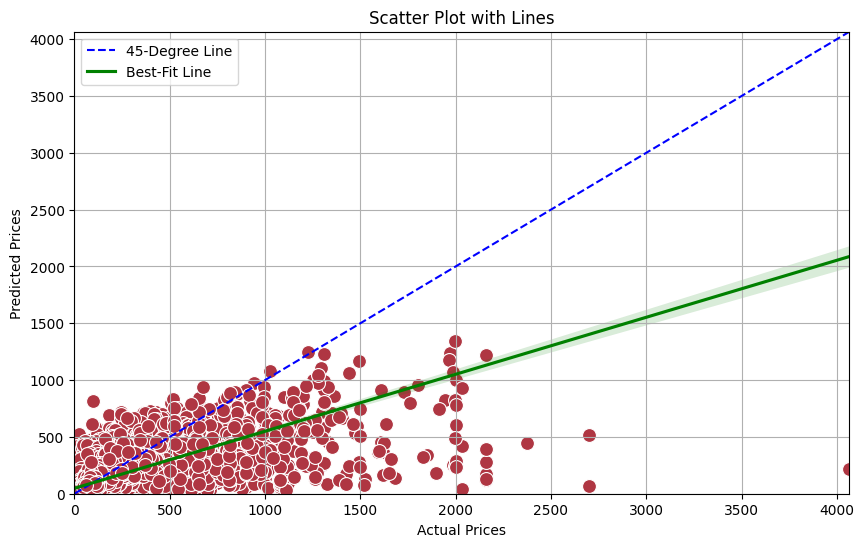

In [ ]:
# Create a scatter plot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='usd_price', y='price_predictions', data=listings_sample, color='#af3642', marker='o', s=100)

# Add a 45-degree line
plt.plot([listings_sample['usd_price'].min(), listings_sample['usd_price'].max()],
         [listings_sample['usd_price'].min(), listings_sample['usd_price'].max()],
         color='blue', linestyle='--', label='45-Degree Line')

# Add the best-fit regression line
sns.regplot(x='usd_price', y='price_predictions', data=listings_sample, color='green', scatter=False, label='Best-Fit Line')

# Customize the chart
plt.title('Scatter Plot with Lines')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)

# Set x-axis and y-axis limits to have the same zero point
plt.xlim(0, max(listings_sample['usd_price'].max(), listings_sample['price_predictions'].max()))
plt.ylim(0, max(listings_sample['usd_price'].max(), listings_sample['price_predictions'].max()))

# Display the chart
plt.show()


One theory we had about why our data was underperforming was due to the amount of variation we have in our data, especially since the data is sourced from 10 different cities. As different cities have very different characteristics, we theorized that one unified model might not be able to do an effective job at price prediction for them all. Certain features that might be important in one city may not be of importance in another city. To illustrate this, we plotting all of our predictions against the actual prices, split by city.

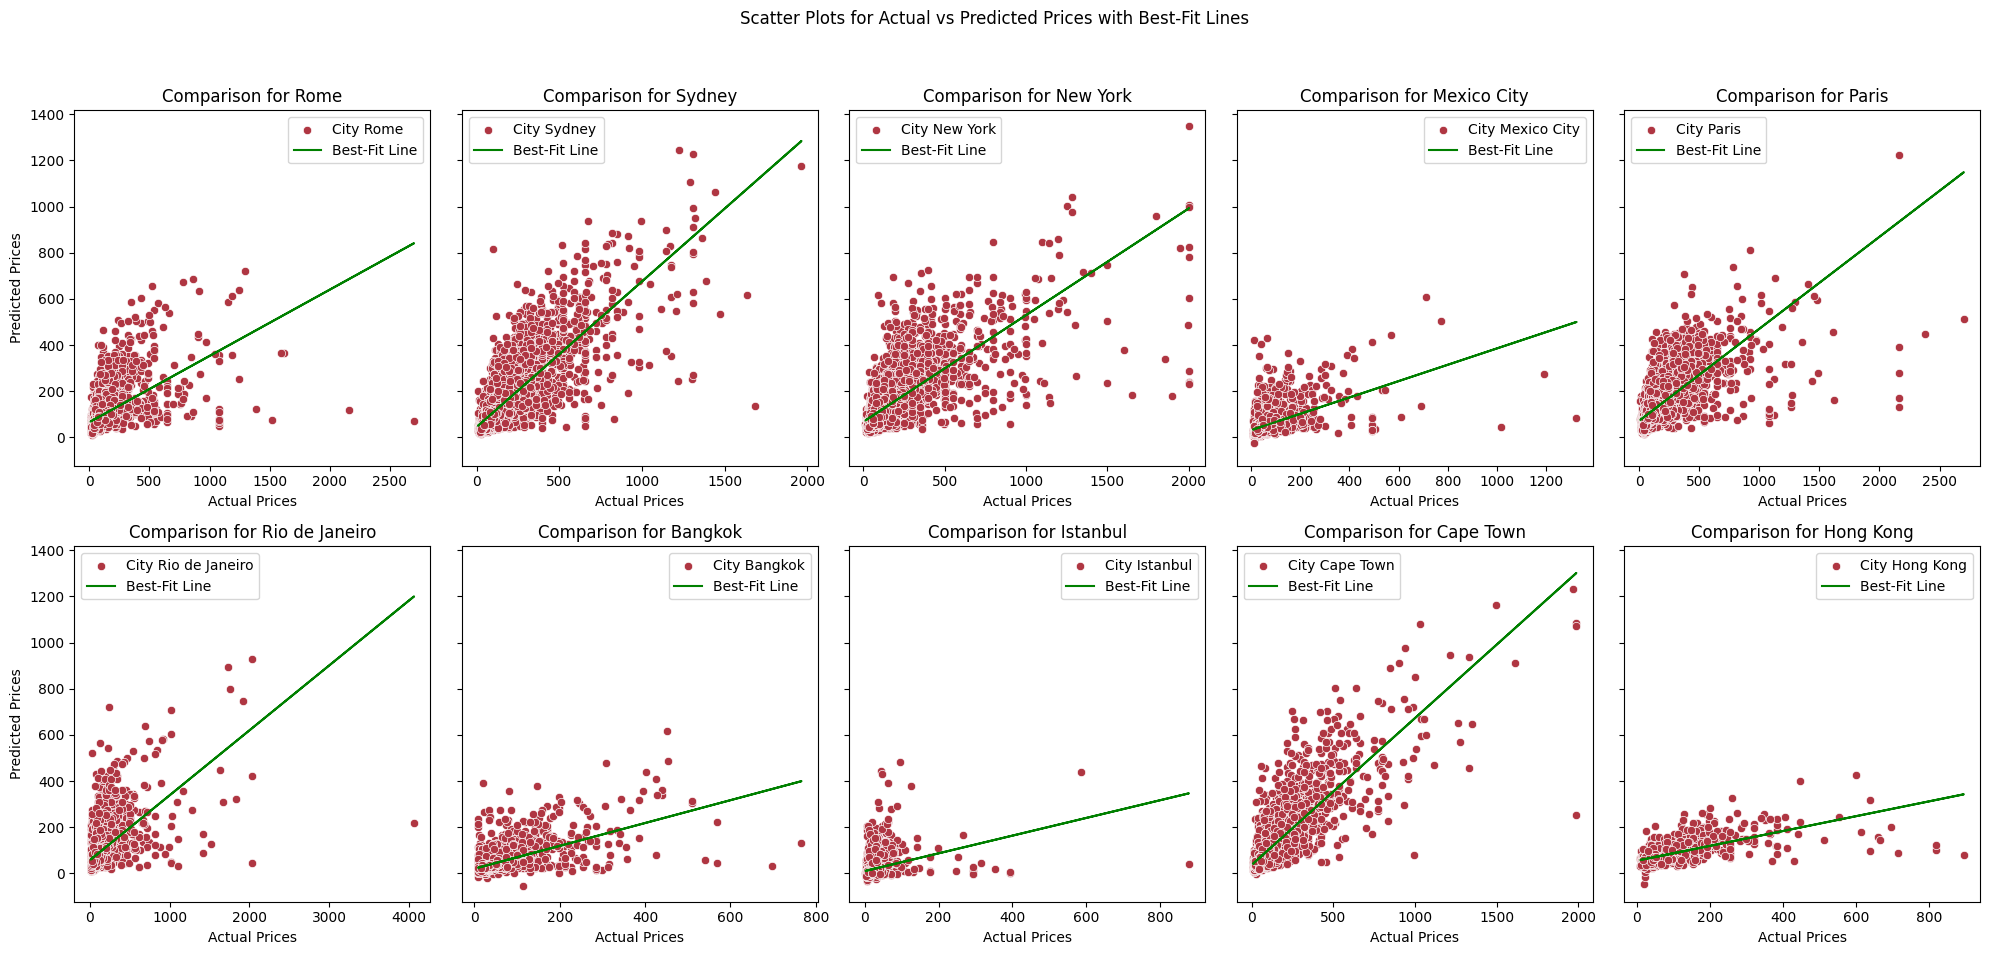

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Replace numeric city codes with city names
listings_sample.city.replace({1:'Rome', 2:'Sydney', 3:'New York', 4:'Mexico City', 5:'Paris',
       6:'Rio de Janeiro', 7:'Bangkok', 8:'Istanbul', 9:'Cape Town', 10:'Hong Kong'}, inplace=True)

# Set the number of cities you want to plot
num_cities = 10  # Adjust this based on your requirement

# Calculate the number of rows and columns for subplots
num_rows = (num_cities - 1) // 5 + 1
num_cols = min(num_cities, 5)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows), sharey=True)

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Loop through each city name and create a scatter plot
for index, city in enumerate(listings_sample['city'].unique(), 1):
    subset_data = listings_sample[listings_sample['city'] == city]

    # Scatter plot for Actual Prices vs Predicted Prices with color #af3642
    sns.scatterplot(x='usd_price', y='price_predictions', data=subset_data, ax=axes[index - 1], color='#af3642', label=f'City {city}')

    # Add the best-fit regression line
    reg_model = LinearRegression()
    reg_model.fit(subset_data[['usd_price']], subset_data['price_predictions'])
    predicted_prices = reg_model.predict(subset_data[['usd_price']])
    axes[index - 1].plot(subset_data['usd_price'], predicted_prices, color='green', label='Best-Fit Line')

    # Customize the individual subplots
    axes[index - 1].set_title(f'Comparison for {city}')
    axes[index - 1].set_xlabel('Actual Prices')
    axes[index - 1].set_ylabel('Predicted Prices')
    axes[index - 1].legend()

# Add a common title for all subplots
plt.suptitle('Scatter Plots for Actual vs Predicted Prices with Best-Fit Lines')

# Adjust layout to prevent clipping of titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

As expected, we see vastly different model performances for each city, with some cities performing much better with our model than others. For example, we see that Sydney, Paris, and Cape Town's Best-Fit Line is much closer to 45 degrees than that of Mexico City, Bangkok, Istanbul, and Hong Kong. This confirms our theory that the individualized characteristics of each city means that price is difficult to predict for all cities as a collective, as their individual attributes will result in a lot of overall noise.

For example, in a dense city with very little space like Hong Kong, a high number of bedrooms may be unrealistic for a listing. However, for a city like Cape Town with more space, people may be more likely to rent out entire houses with many bedrooms. This means how the number of bedrooms would affect prices in both cities would have differing trends, and it would be hard to aggregate these patterns together for just two cities, let alone for 10 whole cities. Key factors affecting prices in one city may not be an important influence for prices in another city also. These unique city characteristics may be more effectively captured in more dedicated models whereas here these nuances would just become noise instead.

This is further confirmed when we look at the count of listings by cities in the table below, where we can see that our worst performing cities, Bangkok and Hong Kong, have the least amount of listings within the whole data set. Hence, the model was likely the most influenced the most by characteristics of Paris and New York, as they had the highest amount of listings within the data set.

Notably, these cities performing badly are those with generally cheaper prices overall, which also suggests that the more expensive cities like New York and Paris had a greater influence in the model's predictive outcomes than the cheaper cities, which again, is likely because New York and Paris had many more listings in the dataset compared to the other more affordable cities, as seen below.

A more reflective way to construct the model would have been to separate out the data by city and build a model for each city that could more effectively capture the nuances and different aspects unique to the cities. This may result in a more well fitted model with more predictive power.

In [ ]:
result = listings_sample.groupby('city').count()[['price_predictions']]
result.rename(columns={'price_predictions': 'Count of Listings'}, inplace=True)
result

,Count of Listings
city,
Bangkok,4377
Cape Town,5607
Hong Kong,1424
Istanbul,4668
Mexico City,6274
New York,11954
Paris,16725
Rio de Janeiro,6807
Rome,9705


### Feature Importance and Business Insights

Despite the subpar predictive power of our results, we still wanted to extracted some coefficients to observe feature importance so Airbnb hosts can see what attributes in a listing customers prioritize and value. For this, we chose our basic linear regression model for interpretability.

In [ ]:
# Creating a dataframe of all features and their coefficients

feature_names = X_train.columns

# Access the logistic regression model from the pipeline
lin_model = lin_reg.named_steps['linearregression']

# Get the coefficients and feature names
coefficients = lin_model.coef_

# Create a DataFrame for each variable

dfs = []
for feature_name, coefficient in zip(feature_names, coefficients):
    df = pd.DataFrame({'Feature': [feature_name], 'Coefficient': [coefficient]})
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
result_df = pd.concat(dfs, ignore_index=True)

In [ ]:
# Sorting by absolute values of coefficients

result_df.reindex(result_df['Coefficient'].abs().sort_values(ascending=False).index)

,Feature,Coefficient
11,room_type,-9206.476478
10,property_type,-8313.204956
12,accommodates,-7000.681762
15,review_scores_rating,6442.907937
14,minimum_nights,-5997.224371
9,longitude,-5341.422694
13,bedrooms,-2205.213766
7,city,1222.367471
8,latitude,-211.051372
23,host_days,-53.708189


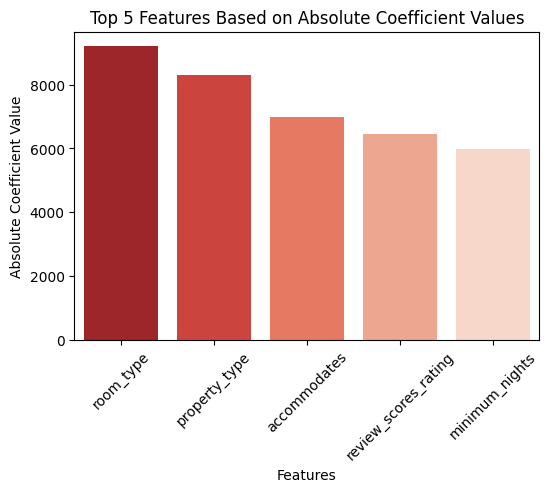

In [ ]:
coefficients_df = pd.read_excel("coefficients for project.xlsx")


# Sorting by absolute values of coefficients
sorted_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Extract the top 5 features
top_5_features = sorted_df.head(5)

# Create a bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=top_5_features['Feature'], y=top_5_features['Coefficient'].abs(), palette='Reds_r')

# Customize the chart
plt.title('Top 5 Features Based on Absolute Coefficient Values')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.xticks(rotation=45)
plt.show()

We can see from the above table and visualizations that room_type is the most important contributor to price for this data set. For room_type, the options were hotel room, entire place, private room, or shared room, so it makes sense that the room type of a listing would affect the prices a lot. Property type is similar, with options of entire apartment, private room in apartment, entire house, private room in house, entire condominium, and other, which we can see would affect price in a similar way.

Accommodates represents the number of people that a listing can fit. This makes sense as this attribute hence relates to the size of the listing, which would likewise affect price.

Review scores rating showed a strong positive correlation with price, where the higher review scores are, the higher prices tend to be. This makes sense as a well reviewed listing is likely an attractive one overall, allowing it to stand out from competition, be recommended by the search algorithm, and hence be able to have higher prices than competitors.

The next most important feature, minimum nights a host allows in the listing, is negatively correlated to price, which also is understable as economies of scale would come into play here. Hosts who would set higher minimum nights for their listing would be willing to lower the price due to the increased amount of time the guest would be staying in the listing, and also reduces the risk of the unit sitting empty.

## Conclusions

In summary, our analysis revealed that gradient boosting model emerged as the most effective among the tested models, especially after effective hyperparameter tuning. However, our exploration also highlighted a crucial insight regarding the data's complexity stemming from variations across 10 different cities.

The distinct characteristics of each city suggested that a unified model might not fully capture the nuances essential for accurate price predictions. Our visualizations, depicting predictions against actual prices split by city, underscored the need for city-specific models to better encapsulate the unique attributes influencing pricing. This segmentation approach could potentially yield more tailored and predictive models for each location.

Moreover, our analysis identified key factors significantly influencing pricing. Room type, property type, accommodates, review scores rating, and minimum nights allowed by hosts emerged as vital contributors. Notably, room type and property type exhibited intuitive impacts on prices, while factors like review scores and minimum nights allowed showcased meaningful correlations.

Although our models may not encompass an entire representation of the data, our analysis has contributed valuable insights. We've also uncovered further directionality for future investigation by pointing out data patterns by city worth more exploration. By discerning the significant factors influencing price predictions, we've gathered crucial domain knowledge that can fuel further research as well. These identified factors serve as guides for future analyses, offering a foundational understanding essential for refining models and conducting more in-depth investigations.

## Appendix

### Amenities 'manual' hot encoding

The amenities column proved to be a challenge as there were thousands of amentities listed, each listing indicating their own unique list. Originally, we hot encoded the top 22 most commonly occuring amenities and added them as features, but it did not improve our models. We also then performed feature selection on all the features, but found no improvement, so we ended up dropping the amenities column as a whole. In the future, perhaps if individual models are run for each city, this column may be more valuable to a model.

In [ ]:
# We added amenities as 32 individual columns, resulting in 53 total columns and then performing feature selection
# However, adding these columns made the performance of our model worse. We ultimately decided to remove the amenities column as a whole.

# Jmanual hot encoding for amenities

list_of_amenities = []
amentity_column = listings_sample['amenities'].apply(eval)

for sublist in amentity_column:
    for item in sublist:
        list_of_amenities.append(item)

ordered_amenities = pd.Series(list_of_amenities).value_counts()
ordered_amenities = ordered_amenities[ordered_amenities > 30000]
ordered_amenities = ordered_amenities.reset_index(name='counts')
list_of_amenities = ordered_amenities['index'].to_list()

#making columns of nulls with column names from the amenity list
from numpy import NaN

for col in list_of_amenities:
    listings_sample[col] = NaN

#creating lists of 1 and 0s if the amentity is mentioned in the appropriate columns
for amenity in list_of_amenities:
    listings_sample[amenity] = listings_sample['amenities'].apply(lambda x: 1 if amenity in x else 0)

### Feature Selection

We performed feature selection via many methods as seen below, both on the larger dataset with amenities, and also on the smaller dataset we ended up using in the main notebook that dropped the amenities column entirely. Neither showed much if any improvements in our model performance, so we ended up dropping the feature selection process in our workflow.

In [ ]:
## Feature selection on reencoded data

# Manual encoding columns
listings_sample_2 = listings_sample.copy()

listings_sample_2.host_response_time.replace({'within an hour': 1, 'unknown': 5, 'a few days or more': 4,
                                            'within a day': 3, 'within a few hours': 2}, inplace = True)
listings_sample_2.host_is_superhost.replace({'t': 1, 'f': 0}, inplace = True)
listings_sample_2.host_has_profile_pic.replace({'t': 1, 'f': 0}, inplace = True)
listings_sample_2.host_identity_verified.replace({'t': 1, 'f': 0}, inplace = True)
listings_sample_2.city.replace({'Rome': 1, 'Sydney': 2, 'New York': 3, 'Mexico City': 4, 'Paris': 5,
       'Rio de Janeiro': 6, 'Bangkok': 7, 'Istanbul': 8, 'Cape Town': 9, 'Hong Kong': 10}, inplace = True)
listings_sample_2.property_type.replace({'Other':6, 'Entire apartment':3, 'Private room in apartment':1,
       'Entire house':4, 'Private room in house':2, 'Entire condominium':5}, inplace = True)
listings_sample_2.room_type.replace({'Hotel room':4, 'Entire place':3, 'Private room':2, 'Shared room':1}, inplace = True)
listings_sample_2.instant_bookable.replace({'t': 1, 'f': 0}, inplace = True)
#listings_sample_2.drop(columns=['instant_bookable', 'host_has_profile_pic', 'latitude', 'longitude'], inplace = True)
listings_sample_2

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,longitude,...,Microwave,Bed linens,Stove,Coffee maker,Oven,Elevator,Fire extinguisher,Dryer,Carbon monoxide alarm,First aid kit
159952,1,1.0,1.00,0,9.0,1,1,1,41.89736,12.49926,...,0,0,0,0,0,1,1,0,0,1
252320,5,NaN,NaN,0,1.0,1,1,2,-33.79560,151.18815,...,0,0,0,0,0,1,0,1,0,0
41559,1,0.9,0.91,0,4.0,1,1,3,40.71581,-73.86197,...,1,1,1,1,1,0,0,0,1,0
47141,4,0.0,1.00,0,6.0,1,1,1,41.89494,12.45334,...,0,1,1,1,1,0,0,0,0,1
264307,1,1.0,1.00,0,1.0,1,1,3,40.65857,-73.92909,...,1,1,0,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16918,5,NaN,NaN,0,1.0,1,1,4,19.41314,-99.17009,...,1,0,0,1,1,1,0,1,0,0
114103,2,1.0,0.83,0,1.0,1,1,2,-33.87719,151.21758,...,1,0,0,1,1,1,0,1,0,0
273824,5,NaN,NaN,0,1.0,1,1,5,48.88056,2.37424,...,0,0,0,0,0,1,0,1,1,0
59877,1,1.0,NaN,0,2.0,1,1,3,40.73138,-73.98807,...,0,0,1,1,1,0,0,0,1,0


In [ ]:
listings_sample_2.T

,159952,252320,41559,47141,264307,242840,144141,87732,113743,174581,...,186953,26668,199387,148637,146741,16918,114103,273824,59877,121844
host_response_time,1,5,1,4,1,3,5,1,1,1,...,1,1,5,5,5,5,2,5,1,5
host_response_rate,1.0,NaN,0.9,0.0,1.0,1.0,NaN,1.0,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
host_acceptance_rate,1.0,NaN,0.91,1.0,1.0,NaN,1.0,0.86,NaN,1.0,...,0.94,1.0,NaN,NaN,0.0,NaN,0.83,NaN,NaN,NaN
host_is_superhost,0,0,0,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
host_total_listings_count,9.0,1.0,4.0,6.0,1.0,2.0,6.0,1.0,4.0,2.0,...,3.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0
host_has_profile_pic,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
host_identity_verified,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
city,1,2,3,1,3,4,5,2,6,2,...,3,2,2,7,4,4,2,5,3,3
latitude,41.89736,-33.7956,40.71581,41.89494,40.65857,19.42844,48.8453,-33.92028,-23.01166,-33.926,...,40.84659,-33.94021,-33.89093,13.73632,19.28263,19.41314,-33.87719,48.88056,40.73138,40.79981
longitude,12.49926,151.18815,-73.86197,12.45334,-73.92909,-99.15925,2.32135,151.10108,-43.31114,151.10299,...,-73.84801,151.23684,151.28234,100.56707,-99.27923,-99.17009,151.21758,2.37424,-73.98807,-73.96097


In [ ]:
listings_sample_2.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'city', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms',
       'minimum_nights', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'host_days', 'usd_price',
       'Wifi', 'Essentials', 'Kitchen', 'Long term stays allowed', 'Hangers',
       'TV', 'Hair dryer', 'Iron', 'Heating', 'Dedicated workspace',
       'Hot water', 'Washer', 'Shampoo', 'Smoke alarm',
       'Dishes and silverware', 'Refrigerator', 'Air conditioning',
       'Cooking basics', 'Microwave', 'Bed linens', 'Stove', 'Coffee maker',
       'Oven', 'Elevator', 'Fire extinguisher', 'Dryer',
       'Carbon monoxide alarm', 

In [ ]:
num_attribs = ['host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'minimum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'host_days', 'latitude', 'longitude']

In [ ]:
cat_attribs =  ['instant_bookable','host_has_profile_pic','host_response_time', 'host_is_superhost', 'host_identity_verified', 'city', 'property_type', 'room_type', 'accommodates', 'bedrooms', 'Wifi', 'Essentials', 'Kitchen', 'Long term stays allowed', 'Hangers',
       'TV', 'Hair dryer', 'Iron', 'Heating', 'Dedicated workspace',
       'Hot water', 'Washer', 'Shampoo', 'Smoke alarm',
       'Dishes and silverware', 'Refrigerator', 'Air conditioning',
       'Cooking basics', 'Microwave', 'Bed linens', 'Stove', 'Coffee maker',
       'Oven', 'Elevator', 'Fire extinguisher', 'Dryer',
       'Carbon monoxide alarm', 'First aid kit']

In [ ]:
listings_sample_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76924 entries, 159952 to 121844
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           76924 non-null  int64  
 1   host_response_rate           45260 non-null  float64
 2   host_acceptance_rate         52124 non-null  float64
 3   host_is_superhost            76924 non-null  int64  
 4   host_total_listings_count    76924 non-null  float64
 5   host_has_profile_pic         76924 non-null  int64  
 6   host_identity_verified       76924 non-null  int64  
 7   city                         76924 non-null  int64  
 8   latitude                     76924 non-null  float64
 9   longitude                    76924 non-null  float64
 10  property_type                76924 non-null  int64  
 11  room_type                    76924 non-null  int64  
 12  accommodates                 76924 non-null  object 
 13  bedrooms       

In [ ]:
from sklearn.model_selection import train_test_split

X = listings_sample_2.drop("usd_price", axis=1)
y = listings_sample_2["usd_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((53846, 52), (23078, 52), (53846,), (23078,))

In [ ]:
# Building preprocessing pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn import set_config
set_config(display='diagram')

num_pipeline = make_pipeline(IterativeImputer(random_state = 42, max_iter = 100), StandardScaler())
cat_pipeline = make_pipeline(IterativeImputer(random_state = 42, max_iter = 100))
# Dropping amenities for now

preprocess_pipeline = ColumnTransformer([
        ("cat", cat_pipeline, cat_attribs),
        ("num", num_pipeline, num_attribs),
    ])
preprocess_pipeline.set_output(transform='pandas')

preprocess_pipeline

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('iterativeimputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42))]),
                                 ['instant_bookable', 'host_has_profile_pic',
                                  'host_response_time', 'host_is_superhost',
                                  'host_identity_verified', 'city',
                                  'property_type', 'room_type', 'accommodates',
                                  'bedrooms', 'Wifi', 'Essentials', 'Kitchen',
                                  'Long term stays allowed', 'H...
                                                                   random_state=42)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['host_response_rate', 'host_acceptance_rate',
                                  'host_total_listings_count', 'minimum_nights',
                                  'review_scores_rating',
                                  'review_scores_accuracy',
                                  'review_scores_cleanliness',
                                  'review_scores_checkin',
                                  'review_scores_communication',
                                  'review_scores_location',
                                  'review_scores_value', 'host_days',
                                  'latitude', 'longitude'])])

### K-Best Feature Selection

One of the feature selection methods we tried was K-Best Feature Selection, however, it only reduced our dataset from having 53 features to having 51 features. We then tried to manually limit the amount of features selected to 30 by narrowing the range of K, but this tanked our model's prediction performances. Ultimately, this step was dropped from our workflow.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Create model
kbest = SelectKBest(score_func=f_regression)

# Create feature selection pipline
k_best_pipe = Pipeline([
    ('prep', preprocess_pipeline),
    ('select', kbest),
    ('model', LinearRegression())
])

# Set parameter grid
param_grid = {
    'select__k': range(1, 30)
}

# Create and fit grid search
grid_search = GridSearchCV(k_best_pipe, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)


# Examine the results
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
display(cv_res.filter(regex = '(^param_|mean_test_score)', axis=1))

best_model = grid_search.best_estimator_
print(f'The selected features are {best_model["prep"].get_feature_names_out()[best_model["select"].get_support()]}')

,param_select__k,mean_test_score
28,29,-99.171083
27,28,-99.185470
26,27,-99.199309
25,26,-99.229232
24,25,-99.431138
21,22,-99.509284
23,24,-99.509289
22,23,-99.509320
20,21,-99.588590
19,20,-99.776196


The selected features are ['cat__instant_bookable' 'cat__host_response_time'
 'cat__host_identity_verified' 'cat__city' 'cat__property_type'
 'cat__room_type' 'cat__accommodates' 'cat__bedrooms' 'cat__Kitchen'
 'cat__TV' 'cat__Hair dryer' 'cat__Iron' 'cat__Heating' 'cat__Washer'
 'cat__Smoke alarm' 'cat__Air conditioning' 'cat__Microwave' 'cat__Stove'
 'cat__Coffee maker' 'cat__Oven' 'cat__Fire extinguisher' 'cat__Dryer'
 'cat__Carbon monoxide alarm' 'num__host_acceptance_rate'
 'num__minimum_nights' 'num__review_scores_rating'
 'num__review_scores_cleanliness' 'num__review_scores_location'
 'num__host_days']


In [ ]:
# The list of attributes selected when we artificially limited K to 30

In [ ]:
list_30 = ['cat__instant_bookable', 'cat__host_response_time',
 'cat__host_identity_verified', 'cat__city', 'cat__property_type',
 'cat__room_type', 'cat__accommodates', 'cat__bedrooms', 'cat__Kitchen',
 'cat__TV', 'cat__Hair dryer', 'cat__Iron', 'cat__Heating', 'cat__Washer',
 'cat__Smoke alarm', 'cat__Air conditioning', 'cat__Microwave', 'cat__Stove',
 'cat__Coffee maker', 'cat__Oven', 'cat__Fire extinguisher', 'cat__Dryer',
 'cat__Carbon monoxide alarm', 'num__host_acceptance_rate',
 'num__minimum_nights', 'num__review_scores_rating',
 'num__review_scores_cleanliness', 'num__review_scores_location',
 'num__host_days']
len(list_30)

29

In [ ]:
# The list of attributes selected when entire range of K was given

In [ ]:
list = ['cat__instant_bookable', 'cat__host_response_time',
 'cat__host_is_superhost', 'cat__host_identity_verified', 'cat__city',
 'cat__property_type', 'cat__room_type', 'cat__accommodates', 'cat__bedrooms',
 'cat__Wifi', 'cat__Essentials', 'cat__Kitchen',
 'cat__Long term stays allowed', 'cat__Hangers', 'cat__TV', 'cat__Hair dryer',
 'cat__Iron', 'cat__Heating', 'cat__Dedicated workspace', 'cat__Hot water',
 'cat__Washer', 'cat__Shampoo', 'cat__Smoke alarm',
 'cat__Dishes and silverware', 'cat__Refrigerator', 'cat__Air conditioning',
 'cat__Cooking basics', 'cat__Microwave', 'cat__Stove', 'cat__Coffee maker',
 'cat__Oven', 'cat__Elevator', 'cat__Fire extinguisher', 'cat__Dryer',
 'cat__Carbon monoxide alarm', 'cat__First aid kit',
 'num__host_response_rate', 'num__host_acceptance_rate',
 'num__host_total_listings_count', 'num__minimum_nights',
 'num__review_scores_rating', 'num__review_scores_accuracy',
 'num__review_scores_cleanliness', 'num__review_scores_checkin',
 'num__review_scores_communication', 'num__review_scores_location',
 'num__review_scores_value', 'num__host_days', 'num__latitude',
 'num__longitude']
len(list)

50

### Lasso Feature Selection


We also tried Lasso Feature Selection, but the model results tanked, so we did not utilize it.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Using Lasso for feature selection
select_from_model = SelectFromModel(Lasso())

# Create a pipeline
model_pipe = Pipeline([
    ('prep', preprocess_pipeline),
    ('select', select_from_model),
    ('model', LinearRegression())
])

# Define the parameter grid to vary the Lasso alpha (regularization strength) and the threshold for SelectFromModel
param_grid = {
    'select__estimator__alpha': [10, 100, 1000],
    'select__threshold': ['mean', 'median']
}

# Create and fit the GridSearchCV
grid_search = GridSearchCV(model_pipe, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# Extract the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Display the cross-validation results
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
display(cv_res.filter(regex='(^param_|mean_test_score)', axis=1))

# Get the best model
best_model = grid_search.best_estimator_

# Print the selected features
selected_features = best_model['prep'].get_feature_names_out()[best_model['select'].get_support()]
print(f'The selected features are {selected_features}')

Best parameters: {'select__estimator__alpha': 10, 'select__threshold': 'median'}


,param_select__estimator__alpha,param_select__threshold,mean_test_score
1,10,median,-100.764520
3,100,median,-100.764520
4,1000,mean,-100.764520
5,1000,median,-100.764520
0,10,mean,-103.337049
2,100,mean,-105.321637


The selected features are ['cat__host_response_time' 'cat__host_is_superhost'
 'cat__host_identity_verified' 'cat__city' 'cat__property_type'
 'cat__room_type' 'cat__accommodates' 'cat__bedrooms'
 'num__host_response_rate' 'num__host_acceptance_rate'
 'num__host_total_listings_count' 'num__minimum_nights'
 'num__review_scores_rating' 'num__review_scores_accuracy'
 'num__review_scores_cleanliness' 'num__review_scores_checkin'
 'num__review_scores_communication' 'num__review_scores_location'
 'num__review_scores_value' 'num__host_days']


In [ ]:
# Refitting the pipeline after feature selection

X_train_prepd = preprocess_pipeline.fit_transform(X_train)

#features_selected = ['city', 'property_type', 'room_type', 'accommodates', 'bedrooms', 'host_days', 'host_acceptance_rate']
X_train_selected = X_train_prepd[['cat__instant_bookable', 'cat__host_response_time',
 'cat__host_identity_verified', 'cat__city', 'cat__property_type',
 'cat__room_type', 'cat__accommodates', 'cat__bedrooms', 'cat__Kitchen',
 'cat__TV', 'cat__Hair dryer', 'cat__Iron', 'cat__Heating', 'cat__Washer',
 'cat__Smoke alarm', 'cat__Air conditioning', 'cat__Microwave', 'cat__Stove',
 'cat__Coffee maker', 'cat__Oven', 'cat__Fire extinguisher', 'cat__Dryer',
 'cat__Carbon monoxide alarm', 'num__host_acceptance_rate',
 'num__minimum_nights', 'num__review_scores_rating',
 'num__review_scores_cleanliness', 'num__review_scores_location',
 'num__host_days']]

In [ ]:
from sklearn.linear_model import LinearRegression

model = make_pipeline(LinearRegression())

model.fit(X_train_selected, y_train)
y_predictions = model.predict(X_train_selected)

rmse = mean_squared_error(y_train, y_predictions, squared=False)
print(f"The training data RMSE is {rmse:.0f} or about {(rmse/y_train.mean()*100):.0f}% error")

The training data RMSE is 99 or about 104% error


In [ ]:
# Calculating R-squared score for training data

print(f'R-squared score from feature selection model is {r2_score(y_train, y_predictions):.3f}')

R-squared score from feature selection model is 0.293


In [ ]:
# Refitting the pipeline on test set after feature selection

X_test_prepd = preprocess_pipeline.fit_transform(X_test)

X_test_selected = X_test_prepd[['cat__instant_bookable', 'cat__host_response_time',
 'cat__host_identity_verified', 'cat__city', 'cat__property_type',
 'cat__room_type', 'cat__accommodates', 'cat__bedrooms', 'cat__Kitchen',
 'cat__TV', 'cat__Hair dryer', 'cat__Iron', 'cat__Heating', 'cat__Washer',
 'cat__Smoke alarm', 'cat__Air conditioning', 'cat__Microwave', 'cat__Stove',
 'cat__Coffee maker', 'cat__Oven', 'cat__Fire extinguisher', 'cat__Dryer',
 'cat__Carbon monoxide alarm', 'num__host_acceptance_rate',
 'num__minimum_nights', 'num__review_scores_rating',
 'num__review_scores_cleanliness', 'num__review_scores_location',
 'num__host_days']]

# Predicting with our fitted model
y_pred = model.predict(X_test_selected)

# Calculating RMSE for test data
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"The test data RMSE after feature selection is {test_rmse:.0f} or about {(test_rmse/y_test.mean()*100):.0f}% error")

The test data RMSE after feature selection is 98 or about 102% error


In [ ]:
# Calculating R-squared score for test data

print(f'R-squared score from feature selection is {r2_score(y_test, y_pred):.3f}')

R-squared score from feature selection is 0.302


In [ ]:
# Calculating R-squared score for test data

print(f'R-squared score from Lasso feature selection is {r2_score(y_test, y_pred):.3f}')

R-squared score from feature selection is 0.027


### SVR

Early on in our model try out process, we also attempted to use Support Vector Regressor. However, the performance was very bad even after hyperparameter tuning, and computationally very expensive, so we eliminated it as an option.

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Creating SVR model
lin_svr = SVR(C=0.1, kernel='linear')

# Creating SVR pipeline
svr_pipeline = Pipeline([
    ("preprocessing", preprocess_pipeline),
    ("svr", lin_svr),
])

# Fitting the SVR pipeline to the training data
svr_pipeline.fit(X_train, y_train)

# Get the number of support vectors for each class
print("Number of support vectors for each class:", lin_svr.n_support_)

# Get the records that are the support vectors (indices)
print("Indices of support vectors:", lin_svr.support_)

# Making predictions on the training set
y_train_pred = svr_pipeline.predict(X_train)

# Calculating the R-squared value
r_squared = r2_score(y_train, y_train_pred)
print("R-squared value:", r_squared)

Number of support vectors for each class: [53686]
Indices of support vectors: [    0     1     2 ... 53843 53844 53845]
R-squared value: 0.19046901964136065


#### Hyperparameter Tuning

In [ ]:
# Defining the parameter grid
param_grid = {'svr__kernel': ['poly'], 'svr__C': [1, 10, 100], 'svr__gamma': [0.001, 0.0001]}

# Creating the GridSearchCV object
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fitting the grid search to training data
grid_search.fit(X_train, y_train)

# Displaying the results
grid_cv_res = pd.DataFrame(grid_search.cv_results_)
grid_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
grid_cv_res.filter(regex='(^param_|mean_test_score)', axis=1)

,param_svr__C,param_svr__gamma,param_svr__kernel,mean_test_score
4,100,0.001,poly,-22263.600050
2,10,0.001,poly,-22276.400520
1,1,0.0001,poly,-22277.845955
3,10,0.0001,poly,-22277.849760
5,100,0.0001,poly,-22277.889616
0,1,0.001,poly,-22278.228198


### XGBRegressor

When we were testing out Boosting ensemble methods, we also tried XGBRegressor. After fitting both a base model and a hyperparameter tuned model, we found that the model performed quite well. However, the base HistGradientBoosting model actually was performing better, so we proceeded with that instead as our boosting method.

In [ ]:
from xgboost import XGBRegressor

# We'll need to use a portion of the training data as 'validation' data to determine how many trees to grow

tr_X_tr, tr_X_v, tr_y_tr, tr_y_v = train_test_split(tr_X, tr_y, test_size = .2, random_state=0)
bst = XGBRegressor(n_estimators=80,
                    max_leaves=24,
                    learning_rate=0.07133747470888435,
                    eval_metric='rmse',
                    num_parallel_tree = 2,
                    colsample_bytree=0.6,
                    subsample=0.6,
                    early_stopping_rounds=10)

bst.fit(tr_X_tr, tr_y_tr, eval_set=[(tr_X_v, tr_y_v)], verbose=False)
print(f'R2 score of XGBoost on training data is {bst.score(tr_X, tr_y):.4f}.')

R2 score of XGBoost on training data is 0.4646.


In [ ]:
# Making predicitons on test data
y_pred = bst.predict(t_X)

# Calculating R-squared for test data
print(f'R2 score for test data from BST model is {sklearn_r2_score(t_y, y_pred):.3f}')

R2 score for test data from BST model is 0.418


In [ ]:
# Making predicitons on training data
y_train_pred = bst.predict(tr_X)

# Calculating RMSE for training data
bst_train_rmse = mean_squared_error(tr_y, y_train_pred, squared=False)
print(f'RSME for XG Boost on training data is {bst_train_rmse:.0f}')

# Calculating RMSE for test data
bst_rmse = mean_squared_error(t_y, y_pred, squared=False)
print(f'RSME for XG Boost on test data is {bst_rmse:.0f}')

RSME for XG Boost on training data is 86
RSME for XG Boost on test data is 90
